In [1]:
# Input data

import scipy.io as spio
import numpy as np

# Reading the data for the Face from all the subjects
BahramFlipp = spio.loadmat(file_name='../data/bci-project-data-RAW/BahramFlipp.mat')
DJFlipp = spio.loadmat(file_name='../data/bci-project-data-RAW/DJFlipp.mat')
NickFlipp = spio.loadmat(file_name='../data/bci-project-data-RAW/NickFlipp.mat')
RoohiFlipp = spio.loadmat(file_name='../data/bci-project-data-RAW/RoohiFlipp.mat')
SarahFlipp = spio.loadmat(file_name='../data/bci-project-data-RAW/SarahFlipp.mat')

# Deviding the input data into train and test
# For creating the training and testing set, 
# 30% percent of each subject is considered as test and
# 70% of each subject is conidered as training.
length = int(BahramFlipp['Intensification_Data'].shape[0] * 0.30)
# length

FlippsDataAll = np.vstack(tup=(BahramFlipp['Intensification_Data'][:], 
                       DJFlipp['Intensification_Data'][:], 
                       NickFlipp['Intensification_Data'][:],
                      RoohiFlipp['Intensification_Data'][:],
                      SarahFlipp['Intensification_Data'][:]))

FlippsDataTrainAll = np.vstack(tup=(BahramFlipp['Intensification_Data'][:-length], 
                       DJFlipp['Intensification_Data'][:-length], 
                       NickFlipp['Intensification_Data'][:-length],
                      RoohiFlipp['Intensification_Data'][:-length],
                      SarahFlipp['Intensification_Data'][:-length]))

FlippsDataTest = np.vstack(tup=(BahramFlipp['Intensification_Data'][-length:], 
                       DJFlipp['Intensification_Data'][-length:], 
                       NickFlipp['Intensification_Data'][-length:],
                      RoohiFlipp['Intensification_Data'][-length:],
                      SarahFlipp['Intensification_Data'][-length:]))

print(FlippsDataAll.shape, FlippsDataAll.dtype,
 FlippsDataTest.shape, FlippsDataTest.dtype, 
 FlippsDataTrainAll.shape, FlippsDataTrainAll.dtype)

BahramFlippDataTrain = BahramFlipp['Intensification_Data'][:-length]
DJFlippDataTrain = DJFlipp['Intensification_Data'][:-length]
NickFlippDataTrain = NickFlipp['Intensification_Data'][:-length]
RoohiFlippDataTrain = RoohiFlipp['Intensification_Data'][:-length]
SarahFlippDataTrain = SarahFlipp['Intensification_Data'][:-length]

# 30% of the training is validation.
# This is applied to every single subject data.
length2 = int(BahramFlippDataTrain.shape[0] * 0.30)
# length2

FlippsDataTrain = np.vstack(tup=(BahramFlippDataTrain[:-length2], 
                       DJFlippDataTrain[:-length2], 
                       NickFlippDataTrain[:-length2],
                      RoohiFlippDataTrain[:-length2],
                      SarahFlippDataTrain[:-length2]))

FlippsDataValid = np.vstack(tup=(BahramFlippDataTrain[-length2:], 
                       DJFlippDataTrain[-length2:],
                       NickFlippDataTrain[-length2:],
                      RoohiFlippDataTrain[-length2:],
                      SarahFlippDataTrain[-length2:]))

print(FlippsDataTrainAll.shape, FlippsDataTrainAll.dtype, 
 FlippsDataTrain.shape, FlippsDataTrain.dtype, 
 FlippsDataValid.shape, FlippsDataValid.dtype)

FlippsLabelAll = np.vstack(tup=(BahramFlipp['Intensification_Label'][:], 
                       DJFlipp['Intensification_Label'][:], 
                       NickFlipp['Intensification_Label'][:],
                      RoohiFlipp['Intensification_Label'][:],
                      SarahFlipp['Intensification_Label'][:]))

FlippsLabelTrainAll = np.vstack(tup=(BahramFlipp['Intensification_Label'][:-length], 
                       DJFlipp['Intensification_Label'][:-length], 
                       NickFlipp['Intensification_Label'][:-length],
                      RoohiFlipp['Intensification_Label'][:-length],
                      SarahFlipp['Intensification_Label'][:-length]))

FlippsLabelTest = np.vstack(tup=(BahramFlipp['Intensification_Label'][-length:], 
                       DJFlipp['Intensification_Label'][-length:], 
                       NickFlipp['Intensification_Label'][-length:],
                      RoohiFlipp['Intensification_Label'][-length:],
                      SarahFlipp['Intensification_Label'][-length:]))

print(FlippsLabelAll.shape, FlippsLabelAll.dtype,
 FlippsLabelTest.shape, FlippsLabelTest.dtype, 
 FlippsDataTrainAll.shape, FlippsDataTrainAll.dtype)

BahramFlippLabelTrain = BahramFlipp['Intensification_Label'][:-length]
DJFlippLabelTrain = DJFlipp['Intensification_Label'][:-length]
NickFlippLabelTrain = NickFlipp['Intensification_Label'][:-length]
RoohiFlippLabelTrain = RoohiFlipp['Intensification_Label'][:-length]
SarahFlippLabelTrain = SarahFlipp['Intensification_Label'][:-length]

FlippsLabelTrain = np.vstack(tup=(BahramFlippLabelTrain[:-length2], 
                       DJFlippLabelTrain[:-length2], 
                       NickFlippLabelTrain[:-length2],
                      RoohiFlippLabelTrain[:-length2],
                      SarahFlippLabelTrain[:-length2]))

FlippsLabelValid = np.vstack(tup=(BahramFlippLabelTrain[-length2:], 
                       DJFlippLabelTrain[-length2:], 
                       NickFlippLabelTrain[-length2:],
                      RoohiFlippLabelTrain[-length2:],
                      SarahFlippLabelTrain[-length2:]))

# # Normalizing input data
# def normalize(inputs, inputs_all):
#     return (inputs - inputs_all.mean(axis=0)[None,:,:]) / inputs_all.std(axis=0)[None,:,:]
# Yalda suggested this normalization.
def normalize(inputs):
    return (inputs - inputs.mean(axis=0)[None,:,:]) / inputs.std(axis=0)[None,:,:]

# onehot vectorizing output labels
def one_hot(labels, n_class):
    """ One-hot encoding """
    expansion = np.eye(n_class)
    y = expansion[:, labels-1].T
    assert y.shape[1] == n_class, "Wrong number of labels!"

    return y

# get minibatches for learning
def get_batches(X, y, batch_size):
    """ Return a generator for batches """
    n_batches = len(X) // batch_size
    X, y = X[:n_batches*batch_size], y[:n_batches*batch_size]

    # Loop over batches and yield
    for b in range(0, len(X), batch_size):
        yield X[b:b+batch_size], y[b:b+batch_size]

# Standardize/normalize train and test
# X_train_norm_all = normalize(inputs=FacesDataTrain, inputs_all=FacesDataAll)
X_train_norm = normalize(inputs=FlippsDataTrain)
X_valid_norm = normalize(inputs=FlippsDataValid)
X_test_norm = normalize(inputs=FlippsDataTest)

print(X_train_norm.shape, X_train_norm.dtype, 
X_valid_norm.shape, X_valid_norm.dtype,
X_test_norm.shape, X_test_norm.dtype)

### Hyperparameters

# Input data
batch_size = X_train_norm.shape[0]// 100 # minibatch size & number of minibatches
seq_len = X_train_norm.shape[1] # Number of steps: each trial length
n_channels = X_train_norm.shape[2] # number of channels in each trial

# Output labels
n_classes = int(FlippsLabelAll.max() + 1)

# Tweekable parameters
learning_rate = 0.001 #1e-3
epochs = 100 # num iterations for updating model
keep_prob = 0.50 # 90% neurons are kept and 10% are dropped out

Y_train = np.array(FlippsLabelTrain, dtype=int).reshape(-1)
Y_valid = np.array(FlippsLabelValid, dtype=int).reshape(-1)
Y_test = np.array(FlippsLabelTest, dtype=int).reshape(-1)

Y_train_onehot = one_hot(labels=Y_train, n_class=n_classes)
Y_valid_onehot = one_hot(labels=Y_valid, n_class=n_classes)
Y_test_onehot = one_hot(labels=Y_test, n_class=n_classes)

print(Y_train_onehot.shape, Y_valid_onehot.shape, Y_test_onehot.shape, 
 X_train_norm.shape, X_valid_norm.shape, X_test_norm.shape)

print(Y_train_onehot.dtype, Y_valid_onehot.dtype, Y_test_onehot.dtype,
 X_train_norm.dtype, X_valid_norm.dtype, X_test_norm.dtype)

# GPUs or CPU

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

#  No graphs is needed on tensorflow
inputs_ = tf.placeholder(tf.float32, [None, seq_len, n_channels], name = 'inputs_')
labels_ = tf.placeholder(tf.float32, [None, n_classes], name = 'labels_')
keep_prob_ = tf.placeholder(tf.float32, name = 'keep_prob_')
learning_rate_ = tf.placeholder(tf.float32, name = 'learning_rate_')

(18900, 205, 16) float64 (5670, 205, 16) float64 (13230, 205, 16) float64
(13230, 205, 16) float64 (9265, 205, 16) float64 (3965, 205, 16) float64
(18900, 1) uint8 (5670, 1) uint8 (13230, 205, 16) float64
(9265, 205, 16) float64 (3965, 205, 16) float64 (5670, 205, 16) float64
(9265, 2) (3965, 2) (5670, 2) (9265, 205, 16) (3965, 205, 16) (5670, 205, 16)
float64 float64 float64 float64 float64 float64
TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


In [2]:
# Forward pass: Convolutional Layers, FC Layer, and Output layer
# (batch, 205, 16) --> (batch, 101, 32)
# (205 - 5 + 0)/2 + 1 = 100+1= 101
# 2/5 with strides/kernel_size is 40% non-overlap/diff region and 60% overlapping window/ common region
in_conv = inputs_
out_conv = tf.layers.conv1d(inputs=in_conv, filters=32, kernel_size=5, strides=2, padding='valid')
out_conv = tf.layers.batch_normalization(inputs=out_conv)
out_conv = tf.nn.relu(features=out_conv)
out_conv = tf.nn.dropout(x=out_conv, keep_prob=keep_prob_)
print(out_conv.shape)

# (batch, 101, 32) --> (batch, 49, 64)
# (101 - 5 + 0)/2 + 1 = (96/2)+1= 48+1= 49
# 2/5 with strides/kernel_size is 40% non-overlap/diff region and 60% overlapping window/ common region
in_conv = out_conv
out_conv = tf.layers.conv1d(inputs=in_conv, filters=64, kernel_size=5, strides=2, padding='valid')
out_conv = tf.layers.batch_normalization(inputs=out_conv)
out_conv = tf.nn.relu(features=out_conv)
out_conv = tf.nn.dropout(x=out_conv, keep_prob=keep_prob_)
print(out_conv.shape)

# (batch, 49, 64) --> (batch, 49*64) --> (batch, 49*64*2)
# 49*64 = 50*64 - 1*64 = 3200 - 64 = 3136, 3136*2 = 6272
# (batch, 49, 64) --> (batch, 3136) --> (batch, 6272)
in_fc = tf.reshape(tensor=out_conv, shape=(-1, 49*64))
out_fc = tf.layers.dense(inputs=in_fc, units=49*64*2)
out_fc = tf.layers.batch_normalization(inputs=out_fc)
out_fc = tf.nn.relu(features=out_fc)
out_fc = tf.nn.dropout(x=out_fc, keep_prob=keep_prob_)
print(in_fc.shape, out_fc.shape)

# (batch, 49*64*2) --> (batch, 2) 
logits = tf.layers.dense(inputs=out_fc, units=n_classes)
print(logits.shape)

(?, 101, 32)
(?, 49, 64)
(?, 3136) (?, 6272)
(?, 2)


In [3]:
# Backward pass: error backpropagation
# Cost function
cost_tensor = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels_)
cost = tf.reduce_mean(input_tensor=cost_tensor)

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate_).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(labels_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

In [4]:
# Train the network
# Plotting the acc and loss curve
train_acc = []
train_loss = []

valid_acc = []
valid_loss = []

with tf.Session() as sess:
    # initalize session global variables just in the case they are initialized.
    sess.run(tf.global_variables_initializer())
    
    for e in range(epochs):
       
        # Loop over batches
        for x, y in get_batches(X_train_norm, Y_train_onehot, batch_size):
            
            # Feed dictionary
            feed = {inputs_:x, labels_:y, keep_prob_: keep_prob, learning_rate_:learning_rate}
            loss, _ , acc = sess.run([cost, optimizer, accuracy], feed_dict = feed)
            
            train_acc.append(acc)
            train_loss.append(loss)
            
            ################################ Validation
            # Initialize 
            loss_v_batch, acc_v_batch = [], []

            # Loop over batches
            for x_v, y_v in get_batches(X_valid_norm, Y_valid_onehot, batch_size):

                # Feed dictionary
                feed = {inputs_:x_v, labels_:y_v, keep_prob_: 1.0}
                loss_v, acc_v = sess.run([cost, accuracy], feed_dict = feed)
                
                acc_v_batch.append(acc_v)
                loss_v_batch.append(loss_v)
                
            valid_acc.append(np.mean(acc_v_batch))
            valid_loss.append(np.mean(loss_v_batch))
            
            # Print info
            print("Epoch: {}/{}".format(e+1, epochs),
                  "Train loss: {:6f}".format(loss),
                  "Valid loss: {:.6f}".format(np.mean(valid_loss)),
                  "Train acc: {:6f}".format(acc),
                  "Valid acc: {:.6f}".format(np.mean(valid_acc)))
            
    ################################ Test
    # Initialize 
    acc_batch, loss_batch = [], []

    # Loop over batches
    for x, y in get_batches(X_test_norm, Y_test_onehot, batch_size):

        # Feed dictionary
        feed = {inputs_:x, labels_:y, keep_prob_:1.0}
        loss, acc = sess.run([cost, accuracy], feed_dict = feed)

        acc_batch.append(acc)
        loss_batch.append(loss)

    # Print info
    print("Epoch: {}/{}".format(e+1, epochs),
          "Test loss: {:6f}".format(np.mean(loss_batch)),
          "Test acc: {:6f}".format(np.mean(acc_batch)))

Epoch: 1/100 Train loss: 0.706310 Valid loss: 5.043736 Train acc: 0.543478 Valid acc: 0.833165
Epoch: 1/100 Train loss: 4.732856 Valid loss: 4.598921 Train acc: 0.847826 Valid acc: 0.833165
Epoch: 1/100 Train loss: 4.746733 Valid loss: 3.822004 Train acc: 0.826087 Valid acc: 0.833165
Epoch: 1/100 Train loss: 2.775822 Valid loss: 3.099969 Train acc: 0.836957 Valid acc: 0.833165
Epoch: 1/100 Train loss: 1.293655 Valid loss: 2.576090 Train acc: 0.826087 Valid acc: 0.833165
Epoch: 1/100 Train loss: 0.488590 Valid loss: 2.312104 Train acc: 0.836957 Valid acc: 0.722152
Epoch: 1/100 Train loss: 0.804161 Valid loss: 2.131428 Train acc: 0.315217 Valid acc: 0.642821
Epoch: 1/100 Train loss: 0.982237 Valid loss: 1.971529 Train acc: 0.163043 Valid acc: 0.583418
Epoch: 1/100 Train loss: 0.821542 Valid loss: 1.829596 Train acc: 0.271739 Valid acc: 0.576171
Epoch: 1/100 Train loss: 0.648454 Valid loss: 1.706647 Train acc: 0.684783 Valid acc: 0.601820
Epoch: 1/100 Train loss: 0.539328 Valid loss: 1.60

Epoch: 1/100 Train loss: 0.438694 Valid loss: 0.668693 Train acc: 0.836957 Valid acc: 0.806876
Epoch: 1/100 Train loss: 0.500002 Valid loss: 0.667884 Train acc: 0.836957 Valid acc: 0.807171
Epoch: 1/100 Train loss: 0.473879 Valid loss: 0.667129 Train acc: 0.826087 Valid acc: 0.807460
Epoch: 1/100 Train loss: 0.457452 Valid loss: 0.666401 Train acc: 0.836957 Valid acc: 0.807742
Epoch: 1/100 Train loss: 0.481124 Valid loss: 0.665681 Train acc: 0.826087 Valid acc: 0.808019
Epoch: 1/100 Train loss: 0.453886 Valid loss: 0.664950 Train acc: 0.836957 Valid acc: 0.808289
Epoch: 1/100 Train loss: 0.439663 Valid loss: 0.664186 Train acc: 0.836957 Valid acc: 0.808554
Epoch: 1/100 Train loss: 0.488602 Valid loss: 0.663378 Train acc: 0.826087 Valid acc: 0.808813
Epoch: 1/100 Train loss: 0.450832 Valid loss: 0.662518 Train acc: 0.836957 Valid acc: 0.809066
Epoch: 1/100 Train loss: 0.475002 Valid loss: 0.661601 Train acc: 0.836957 Valid acc: 0.809315
Epoch: 1/100 Train loss: 0.451703 Valid loss: 0.66

Epoch: 2/100 Train loss: 0.440587 Valid loss: 0.579305 Train acc: 0.847826 Valid acc: 0.824170
Epoch: 2/100 Train loss: 0.446074 Valid loss: 0.578837 Train acc: 0.826087 Valid acc: 0.824279
Epoch: 2/100 Train loss: 0.419988 Valid loss: 0.578364 Train acc: 0.847826 Valid acc: 0.824379
Epoch: 2/100 Train loss: 0.412087 Valid loss: 0.577880 Train acc: 0.836957 Valid acc: 0.824469
Epoch: 2/100 Train loss: 0.433760 Valid loss: 0.577375 Train acc: 0.836957 Valid acc: 0.824548
Epoch: 2/100 Train loss: 0.507116 Valid loss: 0.576861 Train acc: 0.826087 Valid acc: 0.824610
Epoch: 2/100 Train loss: 0.428410 Valid loss: 0.576350 Train acc: 0.826087 Valid acc: 0.824664
Epoch: 2/100 Train loss: 0.460811 Valid loss: 0.575875 Train acc: 0.836957 Valid acc: 0.824719
Epoch: 2/100 Train loss: 0.524489 Valid loss: 0.575455 Train acc: 0.836957 Valid acc: 0.824777
Epoch: 2/100 Train loss: 0.418336 Valid loss: 0.575096 Train acc: 0.815217 Valid acc: 0.824845
Epoch: 2/100 Train loss: 0.395316 Valid loss: 0.57

Epoch: 3/100 Train loss: 0.512979 Valid loss: 0.536912 Train acc: 0.815217 Valid acc: 0.829321
Epoch: 3/100 Train loss: 0.415975 Valid loss: 0.536485 Train acc: 0.815217 Valid acc: 0.829393
Epoch: 3/100 Train loss: 0.503707 Valid loss: 0.536073 Train acc: 0.771739 Valid acc: 0.829473
Epoch: 3/100 Train loss: 0.452935 Valid loss: 0.535679 Train acc: 0.771739 Valid acc: 0.829559
Epoch: 3/100 Train loss: 0.426298 Valid loss: 0.535307 Train acc: 0.836957 Valid acc: 0.829648
Epoch: 3/100 Train loss: 0.428712 Valid loss: 0.534961 Train acc: 0.815217 Valid acc: 0.829740
Epoch: 3/100 Train loss: 0.386319 Valid loss: 0.534638 Train acc: 0.815217 Valid acc: 0.829832
Epoch: 3/100 Train loss: 0.515126 Valid loss: 0.534342 Train acc: 0.804348 Valid acc: 0.829920
Epoch: 3/100 Train loss: 0.439318 Valid loss: 0.534073 Train acc: 0.836957 Valid acc: 0.830013
Epoch: 3/100 Train loss: 0.408587 Valid loss: 0.533822 Train acc: 0.836957 Valid acc: 0.830109
Epoch: 3/100 Train loss: 0.414019 Valid loss: 0.53

Epoch: 4/100 Train loss: 0.381152 Valid loss: 0.514221 Train acc: 0.847826 Valid acc: 0.833139
Epoch: 4/100 Train loss: 0.318591 Valid loss: 0.513881 Train acc: 0.847826 Valid acc: 0.833197
Epoch: 4/100 Train loss: 0.384893 Valid loss: 0.513546 Train acc: 0.836957 Valid acc: 0.833251
Epoch: 4/100 Train loss: 0.335236 Valid loss: 0.513220 Train acc: 0.858696 Valid acc: 0.833301
Epoch: 4/100 Train loss: 0.377432 Valid loss: 0.512902 Train acc: 0.858696 Valid acc: 0.833345
Epoch: 4/100 Train loss: 0.282715 Valid loss: 0.512589 Train acc: 0.880435 Valid acc: 0.833384
Epoch: 4/100 Train loss: 0.281400 Valid loss: 0.512281 Train acc: 0.913043 Valid acc: 0.833421
Epoch: 4/100 Train loss: 0.344178 Valid loss: 0.511973 Train acc: 0.826087 Valid acc: 0.833460
Epoch: 4/100 Train loss: 0.395194 Valid loss: 0.511661 Train acc: 0.815217 Valid acc: 0.833504
Epoch: 4/100 Train loss: 0.267825 Valid loss: 0.511346 Train acc: 0.880435 Valid acc: 0.833549
Epoch: 4/100 Train loss: 0.317395 Valid loss: 0.51

Epoch: 5/100 Train loss: 0.233047 Valid loss: 0.495490 Train acc: 0.913043 Valid acc: 0.836544
Epoch: 5/100 Train loss: 0.374350 Valid loss: 0.495225 Train acc: 0.836957 Valid acc: 0.836577
Epoch: 5/100 Train loss: 0.413126 Valid loss: 0.494970 Train acc: 0.869565 Valid acc: 0.836612
Epoch: 5/100 Train loss: 0.500864 Valid loss: 0.494734 Train acc: 0.847826 Valid acc: 0.836643
Epoch: 5/100 Train loss: 0.355678 Valid loss: 0.494520 Train acc: 0.869565 Valid acc: 0.836671
Epoch: 5/100 Train loss: 0.352831 Valid loss: 0.494322 Train acc: 0.847826 Valid acc: 0.836699
Epoch: 5/100 Train loss: 0.284720 Valid loss: 0.494128 Train acc: 0.847826 Valid acc: 0.836728
Epoch: 5/100 Train loss: 0.287959 Valid loss: 0.493926 Train acc: 0.913043 Valid acc: 0.836762
Epoch: 5/100 Train loss: 0.340228 Valid loss: 0.493713 Train acc: 0.880435 Valid acc: 0.836803
Epoch: 5/100 Train loss: 0.409348 Valid loss: 0.493488 Train acc: 0.858696 Valid acc: 0.836847
Epoch: 5/100 Train loss: 0.326371 Valid loss: 0.49

Epoch: 6/100 Train loss: 0.266691 Valid loss: 0.481631 Train acc: 0.913043 Valid acc: 0.839554
Epoch: 6/100 Train loss: 0.386865 Valid loss: 0.481440 Train acc: 0.804348 Valid acc: 0.839582
Epoch: 6/100 Train loss: 0.241350 Valid loss: 0.481237 Train acc: 0.913043 Valid acc: 0.839619
Epoch: 6/100 Train loss: 0.188276 Valid loss: 0.481024 Train acc: 0.945652 Valid acc: 0.839658
Epoch: 6/100 Train loss: 0.300841 Valid loss: 0.480806 Train acc: 0.858696 Valid acc: 0.839701
Epoch: 6/100 Train loss: 0.386171 Valid loss: 0.480585 Train acc: 0.836957 Valid acc: 0.839746
Epoch: 6/100 Train loss: 0.321472 Valid loss: 0.480366 Train acc: 0.913043 Valid acc: 0.839792
Epoch: 6/100 Train loss: 0.325718 Valid loss: 0.480150 Train acc: 0.891304 Valid acc: 0.839837
Epoch: 6/100 Train loss: 0.333151 Valid loss: 0.479942 Train acc: 0.891304 Valid acc: 0.839881
Epoch: 6/100 Train loss: 0.317435 Valid loss: 0.479741 Train acc: 0.923913 Valid acc: 0.839919
Epoch: 6/100 Train loss: 0.215975 Valid loss: 0.47

Epoch: 7/100 Train loss: 0.322655 Valid loss: 0.469073 Train acc: 0.869565 Valid acc: 0.842341
Epoch: 7/100 Train loss: 0.387136 Valid loss: 0.468927 Train acc: 0.826087 Valid acc: 0.842359
Epoch: 7/100 Train loss: 0.294510 Valid loss: 0.468786 Train acc: 0.858696 Valid acc: 0.842371
Epoch: 7/100 Train loss: 0.434517 Valid loss: 0.468652 Train acc: 0.836957 Valid acc: 0.842381
Epoch: 7/100 Train loss: 0.373320 Valid loss: 0.468528 Train acc: 0.858696 Valid acc: 0.842386
Epoch: 7/100 Train loss: 0.353209 Valid loss: 0.468414 Train acc: 0.836957 Valid acc: 0.842383
Epoch: 7/100 Train loss: 0.336614 Valid loss: 0.468310 Train acc: 0.858696 Valid acc: 0.842376
Epoch: 7/100 Train loss: 0.395468 Valid loss: 0.468215 Train acc: 0.880435 Valid acc: 0.842360
Epoch: 7/100 Train loss: 0.353948 Valid loss: 0.468125 Train acc: 0.869565 Valid acc: 0.842338
Epoch: 7/100 Train loss: 0.392765 Valid loss: 0.468037 Train acc: 0.847826 Valid acc: 0.842314
Epoch: 7/100 Train loss: 0.269351 Valid loss: 0.46

Epoch: 7/100 Train loss: 0.467088 Valid loss: 0.458551 Train acc: 0.815217 Valid acc: 0.844196
Epoch: 7/100 Train loss: 0.420235 Valid loss: 0.458473 Train acc: 0.836957 Valid acc: 0.844213
Epoch: 7/100 Train loss: 0.375103 Valid loss: 0.458398 Train acc: 0.836957 Valid acc: 0.844231
Epoch: 8/100 Train loss: 0.392800 Valid loss: 0.458323 Train acc: 0.826087 Valid acc: 0.844249
Epoch: 8/100 Train loss: 0.310826 Valid loss: 0.458246 Train acc: 0.847826 Valid acc: 0.844266
Epoch: 8/100 Train loss: 0.348581 Valid loss: 0.458163 Train acc: 0.836957 Valid acc: 0.844280
Epoch: 8/100 Train loss: 0.380060 Valid loss: 0.458074 Train acc: 0.847826 Valid acc: 0.844295
Epoch: 8/100 Train loss: 0.333197 Valid loss: 0.457979 Train acc: 0.836957 Valid acc: 0.844310
Epoch: 8/100 Train loss: 0.350246 Valid loss: 0.457878 Train acc: 0.836957 Valid acc: 0.844324
Epoch: 8/100 Train loss: 0.302222 Valid loss: 0.457772 Train acc: 0.858696 Valid acc: 0.844337
Epoch: 8/100 Train loss: 0.317370 Valid loss: 0.45

Epoch: 8/100 Train loss: 0.434083 Valid loss: 0.449509 Train acc: 0.847826 Valid acc: 0.845879
Epoch: 8/100 Train loss: 0.380280 Valid loss: 0.449454 Train acc: 0.847826 Valid acc: 0.845897
Epoch: 8/100 Train loss: 0.371503 Valid loss: 0.449397 Train acc: 0.858696 Valid acc: 0.845915
Epoch: 8/100 Train loss: 0.421700 Valid loss: 0.449336 Train acc: 0.836957 Valid acc: 0.845933
Epoch: 8/100 Train loss: 0.444313 Valid loss: 0.449275 Train acc: 0.815217 Valid acc: 0.845951
Epoch: 8/100 Train loss: 0.392809 Valid loss: 0.449211 Train acc: 0.804348 Valid acc: 0.845971
Epoch: 8/100 Train loss: 0.329661 Valid loss: 0.449144 Train acc: 0.858696 Valid acc: 0.845991
Epoch: 8/100 Train loss: 0.381200 Valid loss: 0.449074 Train acc: 0.836957 Valid acc: 0.846012
Epoch: 8/100 Train loss: 0.400451 Valid loss: 0.449001 Train acc: 0.847826 Valid acc: 0.846031
Epoch: 8/100 Train loss: 0.382910 Valid loss: 0.448927 Train acc: 0.836957 Valid acc: 0.846051
Epoch: 8/100 Train loss: 0.405742 Valid loss: 0.44

Epoch: 9/100 Train loss: 0.374507 Valid loss: 0.441902 Train acc: 0.847826 Valid acc: 0.847137
Epoch: 9/100 Train loss: 0.433600 Valid loss: 0.441857 Train acc: 0.804348 Valid acc: 0.847153
Epoch: 9/100 Train loss: 0.381750 Valid loss: 0.441808 Train acc: 0.847826 Valid acc: 0.847170
Epoch: 9/100 Train loss: 0.456911 Valid loss: 0.441757 Train acc: 0.826087 Valid acc: 0.847188
Epoch: 9/100 Train loss: 0.393972 Valid loss: 0.441700 Train acc: 0.826087 Valid acc: 0.847205
Epoch: 9/100 Train loss: 0.361317 Valid loss: 0.441637 Train acc: 0.847826 Valid acc: 0.847221
Epoch: 9/100 Train loss: 0.414851 Valid loss: 0.441570 Train acc: 0.847826 Valid acc: 0.847240
Epoch: 9/100 Train loss: 0.333037 Valid loss: 0.441499 Train acc: 0.858696 Valid acc: 0.847258
Epoch: 9/100 Train loss: 0.662117 Valid loss: 0.441430 Train acc: 0.793478 Valid acc: 0.847276
Epoch: 9/100 Train loss: 0.409525 Valid loss: 0.441365 Train acc: 0.836957 Valid acc: 0.847293
Epoch: 9/100 Train loss: 0.374614 Valid loss: 0.44

Epoch: 10/100 Train loss: 0.384771 Valid loss: 0.436039 Train acc: 0.836957 Valid acc: 0.848227
Epoch: 10/100 Train loss: 0.307777 Valid loss: 0.435955 Train acc: 0.880435 Valid acc: 0.848243
Epoch: 10/100 Train loss: 0.304559 Valid loss: 0.435870 Train acc: 0.880435 Valid acc: 0.848259
Epoch: 10/100 Train loss: 0.369353 Valid loss: 0.435788 Train acc: 0.815217 Valid acc: 0.848274
Epoch: 10/100 Train loss: 0.337038 Valid loss: 0.435707 Train acc: 0.869565 Valid acc: 0.848287
Epoch: 10/100 Train loss: 0.357539 Valid loss: 0.435632 Train acc: 0.826087 Valid acc: 0.848300
Epoch: 10/100 Train loss: 0.386548 Valid loss: 0.435562 Train acc: 0.847826 Valid acc: 0.848315
Epoch: 10/100 Train loss: 0.422859 Valid loss: 0.435500 Train acc: 0.836957 Valid acc: 0.848328
Epoch: 10/100 Train loss: 0.368642 Valid loss: 0.435445 Train acc: 0.815217 Valid acc: 0.848338
Epoch: 10/100 Train loss: 0.407721 Valid loss: 0.435394 Train acc: 0.815217 Valid acc: 0.848346
Epoch: 10/100 Train loss: 0.424820 Valid

Epoch: 11/100 Train loss: 0.240643 Valid loss: 0.430888 Train acc: 0.934783 Valid acc: 0.849118
Epoch: 11/100 Train loss: 0.238428 Valid loss: 0.430810 Train acc: 0.913043 Valid acc: 0.849130
Epoch: 11/100 Train loss: 0.347910 Valid loss: 0.430732 Train acc: 0.858696 Valid acc: 0.849144
Epoch: 11/100 Train loss: 0.327008 Valid loss: 0.430655 Train acc: 0.891304 Valid acc: 0.849158
Epoch: 11/100 Train loss: 0.324593 Valid loss: 0.430577 Train acc: 0.891304 Valid acc: 0.849173
Epoch: 11/100 Train loss: 0.254383 Valid loss: 0.430501 Train acc: 0.891304 Valid acc: 0.849189
Epoch: 11/100 Train loss: 0.355074 Valid loss: 0.430426 Train acc: 0.847826 Valid acc: 0.849204
Epoch: 11/100 Train loss: 0.299521 Valid loss: 0.430353 Train acc: 0.836957 Valid acc: 0.849219
Epoch: 11/100 Train loss: 0.293034 Valid loss: 0.430282 Train acc: 0.858696 Valid acc: 0.849234
Epoch: 11/100 Train loss: 0.297847 Valid loss: 0.430213 Train acc: 0.847826 Valid acc: 0.849248
Epoch: 11/100 Train loss: 0.266689 Valid

Epoch: 12/100 Train loss: 0.241663 Valid loss: 0.426267 Train acc: 0.902174 Valid acc: 0.849748
Epoch: 12/100 Train loss: 0.314083 Valid loss: 0.426191 Train acc: 0.880435 Valid acc: 0.849762
Epoch: 12/100 Train loss: 0.345019 Valid loss: 0.426114 Train acc: 0.902174 Valid acc: 0.849776
Epoch: 12/100 Train loss: 0.191794 Valid loss: 0.426037 Train acc: 0.945652 Valid acc: 0.849788
Epoch: 12/100 Train loss: 0.230476 Valid loss: 0.425960 Train acc: 0.891304 Valid acc: 0.849801
Epoch: 12/100 Train loss: 0.277056 Valid loss: 0.425883 Train acc: 0.913043 Valid acc: 0.849814
Epoch: 12/100 Train loss: 0.203624 Valid loss: 0.425808 Train acc: 0.902174 Valid acc: 0.849826
Epoch: 12/100 Train loss: 0.184560 Valid loss: 0.425733 Train acc: 0.934783 Valid acc: 0.849838
Epoch: 12/100 Train loss: 0.252239 Valid loss: 0.425659 Train acc: 0.902174 Valid acc: 0.849848
Epoch: 12/100 Train loss: 0.350384 Valid loss: 0.425586 Train acc: 0.902174 Valid acc: 0.849858
Epoch: 12/100 Train loss: 0.335647 Valid

Epoch: 13/100 Train loss: 0.330859 Valid loss: 0.421821 Train acc: 0.858696 Valid acc: 0.850333
Epoch: 13/100 Train loss: 0.248268 Valid loss: 0.421783 Train acc: 0.891304 Valid acc: 0.850325
Epoch: 13/100 Train loss: 0.378204 Valid loss: 0.421745 Train acc: 0.869565 Valid acc: 0.850317
Epoch: 13/100 Train loss: 0.336610 Valid loss: 0.421708 Train acc: 0.836957 Valid acc: 0.850308
Epoch: 13/100 Train loss: 0.295863 Valid loss: 0.421673 Train acc: 0.826087 Valid acc: 0.850300
Epoch: 13/100 Train loss: 0.246278 Valid loss: 0.421638 Train acc: 0.902174 Valid acc: 0.850292
Epoch: 13/100 Train loss: 0.186002 Valid loss: 0.421599 Train acc: 0.902174 Valid acc: 0.850286
Epoch: 13/100 Train loss: 0.103050 Valid loss: 0.421555 Train acc: 0.967391 Valid acc: 0.850282
Epoch: 13/100 Train loss: 0.077218 Valid loss: 0.421507 Train acc: 1.000000 Valid acc: 0.850281
Epoch: 13/100 Train loss: 0.251243 Valid loss: 0.421457 Train acc: 0.880435 Valid acc: 0.850283
Epoch: 13/100 Train loss: 0.252918 Valid

Epoch: 14/100 Train loss: 0.295021 Valid loss: 0.417901 Train acc: 0.869565 Valid acc: 0.850779
Epoch: 14/100 Train loss: 0.297740 Valid loss: 0.417880 Train acc: 0.869565 Valid acc: 0.850778
Epoch: 14/100 Train loss: 0.328493 Valid loss: 0.417854 Train acc: 0.869565 Valid acc: 0.850777
Epoch: 14/100 Train loss: 0.299070 Valid loss: 0.417823 Train acc: 0.847826 Valid acc: 0.850778
Epoch: 14/100 Train loss: 0.270679 Valid loss: 0.417787 Train acc: 0.880435 Valid acc: 0.850781
Epoch: 14/100 Train loss: 0.235347 Valid loss: 0.417746 Train acc: 0.891304 Valid acc: 0.850783
Epoch: 14/100 Train loss: 0.298076 Valid loss: 0.417702 Train acc: 0.902174 Valid acc: 0.850786
Epoch: 14/100 Train loss: 0.372744 Valid loss: 0.417655 Train acc: 0.847826 Valid acc: 0.850790
Epoch: 14/100 Train loss: 0.325177 Valid loss: 0.417607 Train acc: 0.858696 Valid acc: 0.850794
Epoch: 14/100 Train loss: 0.306063 Valid loss: 0.417560 Train acc: 0.869565 Valid acc: 0.850798
Epoch: 14/100 Train loss: 0.380062 Valid

Epoch: 14/100 Train loss: 0.420296 Valid loss: 0.414213 Train acc: 0.804348 Valid acc: 0.851185
Epoch: 14/100 Train loss: 0.401926 Valid loss: 0.414185 Train acc: 0.880435 Valid acc: 0.851191
Epoch: 14/100 Train loss: 0.295841 Valid loss: 0.414156 Train acc: 0.869565 Valid acc: 0.851197
Epoch: 14/100 Train loss: 0.324083 Valid loss: 0.414126 Train acc: 0.858696 Valid acc: 0.851203
Epoch: 14/100 Train loss: 0.380595 Valid loss: 0.414094 Train acc: 0.847826 Valid acc: 0.851210
Epoch: 14/100 Train loss: 0.294973 Valid loss: 0.414059 Train acc: 0.869565 Valid acc: 0.851218
Epoch: 14/100 Train loss: 0.359244 Valid loss: 0.414022 Train acc: 0.858696 Valid acc: 0.851227
Epoch: 14/100 Train loss: 0.426666 Valid loss: 0.413986 Train acc: 0.836957 Valid acc: 0.851236
Epoch: 14/100 Train loss: 0.313475 Valid loss: 0.413950 Train acc: 0.891304 Valid acc: 0.851244
Epoch: 14/100 Train loss: 0.408601 Valid loss: 0.413915 Train acc: 0.847826 Valid acc: 0.851253
Epoch: 14/100 Train loss: 0.374332 Valid

Epoch: 15/100 Train loss: 0.306889 Valid loss: 0.411093 Train acc: 0.826087 Valid acc: 0.851530
Epoch: 15/100 Train loss: 0.414375 Valid loss: 0.411066 Train acc: 0.826087 Valid acc: 0.851529
Epoch: 15/100 Train loss: 0.342071 Valid loss: 0.411032 Train acc: 0.826087 Valid acc: 0.851535
Epoch: 15/100 Train loss: 0.336768 Valid loss: 0.410993 Train acc: 0.826087 Valid acc: 0.851543
Epoch: 15/100 Train loss: 0.386281 Valid loss: 0.410951 Train acc: 0.836957 Valid acc: 0.851551
Epoch: 15/100 Train loss: 0.378261 Valid loss: 0.410908 Train acc: 0.847826 Valid acc: 0.851558
Epoch: 15/100 Train loss: 0.428027 Valid loss: 0.410864 Train acc: 0.847826 Valid acc: 0.851567
Epoch: 15/100 Train loss: 0.402535 Valid loss: 0.410822 Train acc: 0.836957 Valid acc: 0.851576
Epoch: 15/100 Train loss: 0.380481 Valid loss: 0.410780 Train acc: 0.836957 Valid acc: 0.851584
Epoch: 15/100 Train loss: 0.426786 Valid loss: 0.410739 Train acc: 0.826087 Valid acc: 0.851592
Epoch: 15/100 Train loss: 0.374270 Valid

Epoch: 16/100 Train loss: 0.241841 Valid loss: 0.408282 Train acc: 0.934783 Valid acc: 0.851860
Epoch: 16/100 Train loss: 0.375660 Valid loss: 0.408243 Train acc: 0.847826 Valid acc: 0.851868
Epoch: 16/100 Train loss: 0.417790 Valid loss: 0.408205 Train acc: 0.858696 Valid acc: 0.851875
Epoch: 16/100 Train loss: 0.324001 Valid loss: 0.408170 Train acc: 0.836957 Valid acc: 0.851883
Epoch: 16/100 Train loss: 0.373408 Valid loss: 0.408136 Train acc: 0.869565 Valid acc: 0.851889
Epoch: 16/100 Train loss: 0.332507 Valid loss: 0.408107 Train acc: 0.869565 Valid acc: 0.851894
Epoch: 16/100 Train loss: 0.403132 Valid loss: 0.408081 Train acc: 0.793478 Valid acc: 0.851897
Epoch: 16/100 Train loss: 0.454354 Valid loss: 0.408059 Train acc: 0.815217 Valid acc: 0.851901
Epoch: 16/100 Train loss: 0.332015 Valid loss: 0.408040 Train acc: 0.858696 Valid acc: 0.851904
Epoch: 16/100 Train loss: 0.356057 Valid loss: 0.408022 Train acc: 0.869565 Valid acc: 0.851904
Epoch: 16/100 Train loss: 0.382896 Valid

Epoch: 17/100 Train loss: 0.373995 Valid loss: 0.405966 Train acc: 0.869565 Valid acc: 0.852035
Epoch: 17/100 Train loss: 0.436587 Valid loss: 0.405926 Train acc: 0.891304 Valid acc: 0.852040
Epoch: 17/100 Train loss: 0.253123 Valid loss: 0.405886 Train acc: 0.880435 Valid acc: 0.852044
Epoch: 17/100 Train loss: 0.253335 Valid loss: 0.405846 Train acc: 0.913043 Valid acc: 0.852048
Epoch: 17/100 Train loss: 0.272674 Valid loss: 0.405807 Train acc: 0.891304 Valid acc: 0.852052
Epoch: 17/100 Train loss: 0.371820 Valid loss: 0.405769 Train acc: 0.847826 Valid acc: 0.852055
Epoch: 17/100 Train loss: 0.279192 Valid loss: 0.405732 Train acc: 0.891304 Valid acc: 0.852059
Epoch: 17/100 Train loss: 0.267807 Valid loss: 0.405695 Train acc: 0.902174 Valid acc: 0.852063
Epoch: 17/100 Train loss: 0.201506 Valid loss: 0.405658 Train acc: 0.913043 Valid acc: 0.852068
Epoch: 17/100 Train loss: 0.173648 Valid loss: 0.405622 Train acc: 0.902174 Valid acc: 0.852073
Epoch: 17/100 Train loss: 0.183802 Valid

Epoch: 18/100 Train loss: 0.276500 Valid loss: 0.403753 Train acc: 0.934783 Valid acc: 0.852272
Epoch: 18/100 Train loss: 0.168948 Valid loss: 0.403719 Train acc: 0.934783 Valid acc: 0.852281
Epoch: 18/100 Train loss: 0.103508 Valid loss: 0.403683 Train acc: 0.978261 Valid acc: 0.852289
Epoch: 18/100 Train loss: 0.218099 Valid loss: 0.403647 Train acc: 0.902174 Valid acc: 0.852297
Epoch: 18/100 Train loss: 0.280830 Valid loss: 0.403610 Train acc: 0.902174 Valid acc: 0.852302
Epoch: 18/100 Train loss: 0.120098 Valid loss: 0.403574 Train acc: 0.945652 Valid acc: 0.852306
Epoch: 18/100 Train loss: 0.247835 Valid loss: 0.403539 Train acc: 0.913043 Valid acc: 0.852311
Epoch: 18/100 Train loss: 0.249299 Valid loss: 0.403506 Train acc: 0.913043 Valid acc: 0.852315
Epoch: 18/100 Train loss: 0.333549 Valid loss: 0.403472 Train acc: 0.858696 Valid acc: 0.852319
Epoch: 18/100 Train loss: 0.282150 Valid loss: 0.403437 Train acc: 0.880435 Valid acc: 0.852325
Epoch: 18/100 Train loss: 0.221519 Valid

Epoch: 19/100 Train loss: 0.332373 Valid loss: 0.401442 Train acc: 0.858696 Valid acc: 0.852476
Epoch: 19/100 Train loss: 0.221323 Valid loss: 0.401431 Train acc: 0.913043 Valid acc: 0.852467
Epoch: 19/100 Train loss: 0.320652 Valid loss: 0.401423 Train acc: 0.880435 Valid acc: 0.852455
Epoch: 19/100 Train loss: 0.163759 Valid loss: 0.401412 Train acc: 0.902174 Valid acc: 0.852445
Epoch: 19/100 Train loss: 0.130123 Valid loss: 0.401398 Train acc: 0.934783 Valid acc: 0.852439
Epoch: 19/100 Train loss: 0.092356 Valid loss: 0.401379 Train acc: 0.978261 Valid acc: 0.852438
Epoch: 19/100 Train loss: 0.108264 Valid loss: 0.401355 Train acc: 0.956522 Valid acc: 0.852441
Epoch: 19/100 Train loss: 0.217614 Valid loss: 0.401330 Train acc: 0.913043 Valid acc: 0.852446
Epoch: 19/100 Train loss: 0.171238 Valid loss: 0.401305 Train acc: 0.934783 Valid acc: 0.852453
Epoch: 19/100 Train loss: 0.071821 Valid loss: 0.401283 Train acc: 0.978261 Valid acc: 0.852460
Epoch: 19/100 Train loss: 0.206367 Valid

Epoch: 20/100 Train loss: 0.276194 Valid loss: 0.399328 Train acc: 0.880435 Valid acc: 0.852762
Epoch: 20/100 Train loss: 0.260389 Valid loss: 0.399314 Train acc: 0.902174 Valid acc: 0.852760
Epoch: 20/100 Train loss: 0.268903 Valid loss: 0.399303 Train acc: 0.902174 Valid acc: 0.852757
Epoch: 20/100 Train loss: 0.186467 Valid loss: 0.399294 Train acc: 0.923913 Valid acc: 0.852750
Epoch: 20/100 Train loss: 0.246756 Valid loss: 0.399289 Train acc: 0.902174 Valid acc: 0.852741
Epoch: 20/100 Train loss: 0.293472 Valid loss: 0.399285 Train acc: 0.891304 Valid acc: 0.852729
Epoch: 20/100 Train loss: 0.243399 Valid loss: 0.399280 Train acc: 0.913043 Valid acc: 0.852719
Epoch: 20/100 Train loss: 0.290628 Valid loss: 0.399274 Train acc: 0.902174 Valid acc: 0.852709
Epoch: 20/100 Train loss: 0.373399 Valid loss: 0.399267 Train acc: 0.836957 Valid acc: 0.852699
Epoch: 20/100 Train loss: 0.242570 Valid loss: 0.399259 Train acc: 0.923913 Valid acc: 0.852689
Epoch: 20/100 Train loss: 0.403213 Valid

Epoch: 20/100 Train loss: 0.287167 Valid loss: 0.397714 Train acc: 0.869565 Valid acc: 0.852819
Epoch: 20/100 Train loss: 0.277284 Valid loss: 0.397693 Train acc: 0.891304 Valid acc: 0.852822
Epoch: 20/100 Train loss: 0.379769 Valid loss: 0.397672 Train acc: 0.869565 Valid acc: 0.852825
Epoch: 20/100 Train loss: 0.252417 Valid loss: 0.397650 Train acc: 0.869565 Valid acc: 0.852829
Epoch: 20/100 Train loss: 0.340999 Valid loss: 0.397628 Train acc: 0.858696 Valid acc: 0.852832
Epoch: 20/100 Train loss: 0.362442 Valid loss: 0.397606 Train acc: 0.815217 Valid acc: 0.852836
Epoch: 20/100 Train loss: 0.337274 Valid loss: 0.397584 Train acc: 0.869565 Valid acc: 0.852841
Epoch: 20/100 Train loss: 0.307638 Valid loss: 0.397563 Train acc: 0.869565 Valid acc: 0.852845
Epoch: 20/100 Train loss: 0.378204 Valid loss: 0.397543 Train acc: 0.847826 Valid acc: 0.852848
Epoch: 20/100 Train loss: 0.327738 Valid loss: 0.397525 Train acc: 0.880435 Valid acc: 0.852850
Epoch: 20/100 Train loss: 0.350017 Valid

Epoch: 21/100 Train loss: 0.275633 Valid loss: 0.396014 Train acc: 0.869565 Valid acc: 0.852988
Epoch: 21/100 Train loss: 0.315017 Valid loss: 0.395996 Train acc: 0.858696 Valid acc: 0.852990
Epoch: 21/100 Train loss: 0.372207 Valid loss: 0.395977 Train acc: 0.847826 Valid acc: 0.852992
Epoch: 21/100 Train loss: 0.332820 Valid loss: 0.395957 Train acc: 0.880435 Valid acc: 0.852994
Epoch: 21/100 Train loss: 0.322636 Valid loss: 0.395939 Train acc: 0.847826 Valid acc: 0.852995
Epoch: 21/100 Train loss: 0.459100 Valid loss: 0.395922 Train acc: 0.836957 Valid acc: 0.852996
Epoch: 21/100 Train loss: 0.324894 Valid loss: 0.395907 Train acc: 0.847826 Valid acc: 0.852997
Epoch: 21/100 Train loss: 0.353030 Valid loss: 0.395892 Train acc: 0.836957 Valid acc: 0.852997
Epoch: 21/100 Train loss: 0.358752 Valid loss: 0.395879 Train acc: 0.836957 Valid acc: 0.852997
Epoch: 21/100 Train loss: 0.389343 Valid loss: 0.395869 Train acc: 0.847826 Valid acc: 0.852994
Epoch: 21/100 Train loss: 0.298296 Valid

Epoch: 22/100 Train loss: 0.301903 Valid loss: 0.394657 Train acc: 0.847826 Valid acc: 0.853021
Epoch: 22/100 Train loss: 0.305507 Valid loss: 0.394636 Train acc: 0.858696 Valid acc: 0.853024
Epoch: 22/100 Train loss: 0.344715 Valid loss: 0.394616 Train acc: 0.826087 Valid acc: 0.853025
Epoch: 22/100 Train loss: 0.366261 Valid loss: 0.394598 Train acc: 0.880435 Valid acc: 0.853026
Epoch: 22/100 Train loss: 0.463224 Valid loss: 0.394583 Train acc: 0.815217 Valid acc: 0.853027
Epoch: 22/100 Train loss: 0.332091 Valid loss: 0.394571 Train acc: 0.869565 Valid acc: 0.853024
Epoch: 22/100 Train loss: 0.326385 Valid loss: 0.394562 Train acc: 0.869565 Valid acc: 0.853022
Epoch: 22/100 Train loss: 0.312459 Valid loss: 0.394554 Train acc: 0.858696 Valid acc: 0.853017
Epoch: 22/100 Train loss: 0.333102 Valid loss: 0.394548 Train acc: 0.804348 Valid acc: 0.853012
Epoch: 22/100 Train loss: 0.414327 Valid loss: 0.394542 Train acc: 0.793478 Valid acc: 0.853008
Epoch: 22/100 Train loss: 0.292495 Valid

Epoch: 23/100 Train loss: 0.284287 Valid loss: 0.393634 Train acc: 0.902174 Valid acc: 0.852927
Epoch: 23/100 Train loss: 0.232367 Valid loss: 0.393620 Train acc: 0.880435 Valid acc: 0.852931
Epoch: 23/100 Train loss: 0.223404 Valid loss: 0.393605 Train acc: 0.880435 Valid acc: 0.852934
Epoch: 23/100 Train loss: 0.245303 Valid loss: 0.393591 Train acc: 0.902174 Valid acc: 0.852937
Epoch: 23/100 Train loss: 0.206348 Valid loss: 0.393577 Train acc: 0.902174 Valid acc: 0.852940
Epoch: 23/100 Train loss: 0.271729 Valid loss: 0.393563 Train acc: 0.923913 Valid acc: 0.852943
Epoch: 23/100 Train loss: 0.175870 Valid loss: 0.393547 Train acc: 0.934783 Valid acc: 0.852946
Epoch: 23/100 Train loss: 0.225855 Valid loss: 0.393531 Train acc: 0.923913 Valid acc: 0.852950
Epoch: 23/100 Train loss: 0.188252 Valid loss: 0.393514 Train acc: 0.934783 Valid acc: 0.852953
Epoch: 23/100 Train loss: 0.220610 Valid loss: 0.393497 Train acc: 0.913043 Valid acc: 0.852957
Epoch: 23/100 Train loss: 0.300395 Valid

Epoch: 24/100 Train loss: 0.113063 Valid loss: 0.392490 Train acc: 0.945652 Valid acc: 0.853011
Epoch: 24/100 Train loss: 0.175931 Valid loss: 0.392473 Train acc: 0.923913 Valid acc: 0.853015
Epoch: 24/100 Train loss: 0.204210 Valid loss: 0.392456 Train acc: 0.913043 Valid acc: 0.853017
Epoch: 24/100 Train loss: 0.053407 Valid loss: 0.392440 Train acc: 0.989130 Valid acc: 0.853019
Epoch: 24/100 Train loss: 0.204710 Valid loss: 0.392426 Train acc: 0.923913 Valid acc: 0.853020
Epoch: 24/100 Train loss: 0.236712 Valid loss: 0.392413 Train acc: 0.956522 Valid acc: 0.853020
Epoch: 24/100 Train loss: 0.239907 Valid loss: 0.392400 Train acc: 0.913043 Valid acc: 0.853020
Epoch: 24/100 Train loss: 0.285666 Valid loss: 0.392385 Train acc: 0.913043 Valid acc: 0.853020
Epoch: 24/100 Train loss: 0.180151 Valid loss: 0.392369 Train acc: 0.934783 Valid acc: 0.853022
Epoch: 24/100 Train loss: 0.165761 Valid loss: 0.392351 Train acc: 0.902174 Valid acc: 0.853024
Epoch: 24/100 Train loss: 0.176253 Valid

Epoch: 25/100 Train loss: 0.175257 Valid loss: 0.391496 Train acc: 0.956522 Valid acc: 0.852911
Epoch: 25/100 Train loss: 0.205931 Valid loss: 0.391499 Train acc: 0.923913 Valid acc: 0.852899
Epoch: 25/100 Train loss: 0.138098 Valid loss: 0.391496 Train acc: 0.945652 Valid acc: 0.852891
Epoch: 25/100 Train loss: 0.080056 Valid loss: 0.391488 Train acc: 0.967391 Valid acc: 0.852888
Epoch: 25/100 Train loss: 0.174314 Valid loss: 0.391478 Train acc: 0.923913 Valid acc: 0.852888
Epoch: 25/100 Train loss: 0.137603 Valid loss: 0.391468 Train acc: 0.978261 Valid acc: 0.852889
Epoch: 25/100 Train loss: 0.039172 Valid loss: 0.391462 Train acc: 1.000000 Valid acc: 0.852892
Epoch: 25/100 Train loss: 0.107835 Valid loss: 0.391460 Train acc: 0.967391 Valid acc: 0.852895
Epoch: 25/100 Train loss: 0.232871 Valid loss: 0.391459 Train acc: 0.902174 Valid acc: 0.852899
Epoch: 25/100 Train loss: 0.173594 Valid loss: 0.391457 Train acc: 0.956522 Valid acc: 0.852902
Epoch: 25/100 Train loss: 0.174413 Valid

Epoch: 26/100 Train loss: 0.216513 Valid loss: 0.390770 Train acc: 0.913043 Valid acc: 0.852857
Epoch: 26/100 Train loss: 0.207254 Valid loss: 0.390771 Train acc: 0.923913 Valid acc: 0.852848
Epoch: 26/100 Train loss: 0.289935 Valid loss: 0.390776 Train acc: 0.880435 Valid acc: 0.852837
Epoch: 26/100 Train loss: 0.356252 Valid loss: 0.390783 Train acc: 0.836957 Valid acc: 0.852824
Epoch: 26/100 Train loss: 0.247731 Valid loss: 0.390791 Train acc: 0.923913 Valid acc: 0.852810
Epoch: 26/100 Train loss: 0.285603 Valid loss: 0.390797 Train acc: 0.880435 Valid acc: 0.852798
Epoch: 26/100 Train loss: 0.195695 Valid loss: 0.390798 Train acc: 0.923913 Valid acc: 0.852787
Epoch: 26/100 Train loss: 0.358955 Valid loss: 0.390796 Train acc: 0.836957 Valid acc: 0.852779
Epoch: 26/100 Train loss: 0.259776 Valid loss: 0.390791 Train acc: 0.891304 Valid acc: 0.852773
Epoch: 26/100 Train loss: 0.213400 Valid loss: 0.390784 Train acc: 0.902174 Valid acc: 0.852768
Epoch: 26/100 Train loss: 0.187971 Valid

Epoch: 26/100 Train loss: 0.249363 Valid loss: 0.390071 Train acc: 0.902174 Valid acc: 0.852722
Epoch: 26/100 Train loss: 0.387035 Valid loss: 0.390059 Train acc: 0.804348 Valid acc: 0.852722
Epoch: 26/100 Train loss: 0.284043 Valid loss: 0.390046 Train acc: 0.869565 Valid acc: 0.852721
Epoch: 26/100 Train loss: 0.236778 Valid loss: 0.390034 Train acc: 0.913043 Valid acc: 0.852721
Epoch: 26/100 Train loss: 0.231041 Valid loss: 0.390021 Train acc: 0.913043 Valid acc: 0.852721
Epoch: 26/100 Train loss: 0.290329 Valid loss: 0.390009 Train acc: 0.858696 Valid acc: 0.852721
Epoch: 26/100 Train loss: 0.297003 Valid loss: 0.389997 Train acc: 0.880435 Valid acc: 0.852721
Epoch: 26/100 Train loss: 0.205156 Valid loss: 0.389987 Train acc: 0.891304 Valid acc: 0.852720
Epoch: 27/100 Train loss: 0.207176 Valid loss: 0.389978 Train acc: 0.913043 Valid acc: 0.852719
Epoch: 27/100 Train loss: 0.193672 Valid loss: 0.389969 Train acc: 0.923913 Valid acc: 0.852717
Epoch: 27/100 Train loss: 0.284699 Valid

Epoch: 27/100 Train loss: 0.332767 Valid loss: 0.389595 Train acc: 0.869565 Valid acc: 0.852564
Epoch: 27/100 Train loss: 0.908410 Valid loss: 0.389584 Train acc: 0.847826 Valid acc: 0.852564
Epoch: 27/100 Train loss: 0.249013 Valid loss: 0.389572 Train acc: 0.891304 Valid acc: 0.852564
Epoch: 27/100 Train loss: 0.245734 Valid loss: 0.389560 Train acc: 0.923913 Valid acc: 0.852565
Epoch: 27/100 Train loss: 0.309764 Valid loss: 0.389547 Train acc: 0.858696 Valid acc: 0.852566
Epoch: 27/100 Train loss: 0.206680 Valid loss: 0.389534 Train acc: 0.891304 Valid acc: 0.852568
Epoch: 27/100 Train loss: 0.271717 Valid loss: 0.389520 Train acc: 0.923913 Valid acc: 0.852570
Epoch: 27/100 Train loss: 0.187923 Valid loss: 0.389506 Train acc: 0.913043 Valid acc: 0.852572
Epoch: 27/100 Train loss: 0.383656 Valid loss: 0.389493 Train acc: 0.836957 Valid acc: 0.852572
Epoch: 27/100 Train loss: 0.270187 Valid loss: 0.389481 Train acc: 0.902174 Valid acc: 0.852570
Epoch: 27/100 Train loss: 0.191080 Valid

Epoch: 28/100 Train loss: 0.209192 Valid loss: 0.388949 Train acc: 0.902174 Valid acc: 0.852494
Epoch: 28/100 Train loss: 0.364006 Valid loss: 0.388944 Train acc: 0.847826 Valid acc: 0.852490
Epoch: 28/100 Train loss: 0.333875 Valid loss: 0.388940 Train acc: 0.858696 Valid acc: 0.852485
Epoch: 28/100 Train loss: 0.285814 Valid loss: 0.388937 Train acc: 0.858696 Valid acc: 0.852481
Epoch: 28/100 Train loss: 0.316491 Valid loss: 0.388935 Train acc: 0.869565 Valid acc: 0.852476
Epoch: 28/100 Train loss: 0.348048 Valid loss: 0.388935 Train acc: 0.891304 Valid acc: 0.852469
Epoch: 28/100 Train loss: 0.312721 Valid loss: 0.388936 Train acc: 0.826087 Valid acc: 0.852462
Epoch: 28/100 Train loss: 0.244262 Valid loss: 0.388938 Train acc: 0.880435 Valid acc: 0.852456
Epoch: 28/100 Train loss: 0.335898 Valid loss: 0.388938 Train acc: 0.836957 Valid acc: 0.852450
Epoch: 28/100 Train loss: 0.220277 Valid loss: 0.388937 Train acc: 0.902174 Valid acc: 0.852445
Epoch: 28/100 Train loss: 0.325544 Valid

Epoch: 29/100 Train loss: 0.212144 Valid loss: 0.388676 Train acc: 0.902174 Valid acc: 0.852308
Epoch: 29/100 Train loss: 0.242262 Valid loss: 0.388670 Train acc: 0.869565 Valid acc: 0.852311
Epoch: 29/100 Train loss: 0.140154 Valid loss: 0.388663 Train acc: 0.956522 Valid acc: 0.852313
Epoch: 29/100 Train loss: 0.134497 Valid loss: 0.388657 Train acc: 0.945652 Valid acc: 0.852316
Epoch: 29/100 Train loss: 0.077394 Valid loss: 0.388651 Train acc: 1.000000 Valid acc: 0.852317
Epoch: 29/100 Train loss: 0.179835 Valid loss: 0.388645 Train acc: 0.934783 Valid acc: 0.852319
Epoch: 29/100 Train loss: 0.189303 Valid loss: 0.388639 Train acc: 0.934783 Valid acc: 0.852322
Epoch: 29/100 Train loss: 0.173585 Valid loss: 0.388633 Train acc: 0.945652 Valid acc: 0.852324
Epoch: 29/100 Train loss: 0.150118 Valid loss: 0.388627 Train acc: 0.923913 Valid acc: 0.852326
Epoch: 29/100 Train loss: 0.191683 Valid loss: 0.388620 Train acc: 0.934783 Valid acc: 0.852328
Epoch: 29/100 Train loss: 0.200340 Valid

Epoch: 30/100 Train loss: 0.083333 Valid loss: 0.388484 Train acc: 0.978261 Valid acc: 0.852282
Epoch: 30/100 Train loss: 0.118965 Valid loss: 0.388482 Train acc: 0.967391 Valid acc: 0.852285
Epoch: 30/100 Train loss: 0.131328 Valid loss: 0.388481 Train acc: 0.956522 Valid acc: 0.852287
Epoch: 30/100 Train loss: 0.193445 Valid loss: 0.388479 Train acc: 0.934783 Valid acc: 0.852289
Epoch: 30/100 Train loss: 0.115691 Valid loss: 0.388479 Train acc: 0.945652 Valid acc: 0.852289
Epoch: 30/100 Train loss: 0.149581 Valid loss: 0.388478 Train acc: 0.923913 Valid acc: 0.852290
Epoch: 30/100 Train loss: 0.149016 Valid loss: 0.388478 Train acc: 0.945652 Valid acc: 0.852290
Epoch: 30/100 Train loss: 0.092123 Valid loss: 0.388478 Train acc: 0.967391 Valid acc: 0.852290
Epoch: 30/100 Train loss: 0.111056 Valid loss: 0.388479 Train acc: 0.956522 Valid acc: 0.852291
Epoch: 30/100 Train loss: 0.218443 Valid loss: 0.388479 Train acc: 0.891304 Valid acc: 0.852291
Epoch: 30/100 Train loss: 0.144864 Valid

Epoch: 31/100 Train loss: 0.100447 Valid loss: 0.388292 Train acc: 0.967391 Valid acc: 0.852126
Epoch: 31/100 Train loss: 0.153892 Valid loss: 0.388291 Train acc: 0.945652 Valid acc: 0.852129
Epoch: 31/100 Train loss: 0.146483 Valid loss: 0.388292 Train acc: 0.967391 Valid acc: 0.852133
Epoch: 31/100 Train loss: 0.154485 Valid loss: 0.388296 Train acc: 0.945652 Valid acc: 0.852139
Epoch: 31/100 Train loss: 0.020730 Valid loss: 0.388304 Train acc: 1.000000 Valid acc: 0.852144
Epoch: 31/100 Train loss: 0.158127 Valid loss: 0.388315 Train acc: 0.945652 Valid acc: 0.852149
Epoch: 31/100 Train loss: 0.330788 Valid loss: 0.388326 Train acc: 0.923913 Valid acc: 0.852155
Epoch: 31/100 Train loss: 0.031739 Valid loss: 0.388337 Train acc: 0.989130 Valid acc: 0.852160
Epoch: 31/100 Train loss: 0.089614 Valid loss: 0.388348 Train acc: 0.967391 Valid acc: 0.852165
Epoch: 31/100 Train loss: 0.188608 Valid loss: 0.388358 Train acc: 0.945652 Valid acc: 0.852171
Epoch: 31/100 Train loss: 0.034195 Valid

Epoch: 32/100 Train loss: 0.246759 Valid loss: 0.388128 Train acc: 0.902174 Valid acc: 0.852194
Epoch: 32/100 Train loss: 0.203033 Valid loss: 0.388122 Train acc: 0.913043 Valid acc: 0.852194
Epoch: 32/100 Train loss: 0.183943 Valid loss: 0.388116 Train acc: 0.913043 Valid acc: 0.852193
Epoch: 32/100 Train loss: 0.140855 Valid loss: 0.388111 Train acc: 0.956522 Valid acc: 0.852193
Epoch: 32/100 Train loss: 0.151650 Valid loss: 0.388106 Train acc: 0.956522 Valid acc: 0.852192
Epoch: 32/100 Train loss: 0.314032 Valid loss: 0.388100 Train acc: 0.858696 Valid acc: 0.852192
Epoch: 32/100 Train loss: 0.247756 Valid loss: 0.388095 Train acc: 0.923913 Valid acc: 0.852192
Epoch: 32/100 Train loss: 0.164415 Valid loss: 0.388090 Train acc: 0.902174 Valid acc: 0.852192
Epoch: 32/100 Train loss: 0.188274 Valid loss: 0.388085 Train acc: 0.934783 Valid acc: 0.852193
Epoch: 32/100 Train loss: 0.283477 Valid loss: 0.388082 Train acc: 0.934783 Valid acc: 0.852193
Epoch: 32/100 Train loss: 0.218534 Valid

Epoch: 32/100 Train loss: 0.156112 Valid loss: 0.387802 Train acc: 0.956522 Valid acc: 0.852277
Epoch: 32/100 Train loss: 0.166636 Valid loss: 0.387790 Train acc: 0.923913 Valid acc: 0.852281
Epoch: 32/100 Train loss: 0.128558 Valid loss: 0.387778 Train acc: 0.934783 Valid acc: 0.852284
Epoch: 32/100 Train loss: 0.162142 Valid loss: 0.387766 Train acc: 0.923913 Valid acc: 0.852288
Epoch: 32/100 Train loss: 0.368339 Valid loss: 0.387754 Train acc: 0.902174 Valid acc: 0.852291
Epoch: 32/100 Train loss: 0.207825 Valid loss: 0.387741 Train acc: 0.934783 Valid acc: 0.852295
Epoch: 33/100 Train loss: 0.245662 Valid loss: 0.387729 Train acc: 0.891304 Valid acc: 0.852298
Epoch: 33/100 Train loss: 0.203248 Valid loss: 0.387717 Train acc: 0.902174 Valid acc: 0.852301
Epoch: 33/100 Train loss: 0.168956 Valid loss: 0.387705 Train acc: 0.923913 Valid acc: 0.852304
Epoch: 33/100 Train loss: 0.255809 Valid loss: 0.387694 Train acc: 0.880435 Valid acc: 0.852306
Epoch: 33/100 Train loss: 0.200557 Valid

Epoch: 33/100 Train loss: 0.195535 Valid loss: 0.387712 Train acc: 0.934783 Valid acc: 0.852353
Epoch: 33/100 Train loss: 0.125699 Valid loss: 0.387708 Train acc: 0.956522 Valid acc: 0.852355
Epoch: 33/100 Train loss: 0.135604 Valid loss: 0.387704 Train acc: 0.945652 Valid acc: 0.852356
Epoch: 33/100 Train loss: 0.202114 Valid loss: 0.387698 Train acc: 0.902174 Valid acc: 0.852359
Epoch: 33/100 Train loss: 0.133346 Valid loss: 0.387693 Train acc: 0.956522 Valid acc: 0.852362
Epoch: 33/100 Train loss: 0.175081 Valid loss: 0.387687 Train acc: 0.923913 Valid acc: 0.852365
Epoch: 33/100 Train loss: 0.277000 Valid loss: 0.387681 Train acc: 0.869565 Valid acc: 0.852369
Epoch: 33/100 Train loss: 0.244810 Valid loss: 0.387674 Train acc: 0.913043 Valid acc: 0.852373
Epoch: 33/100 Train loss: 0.331133 Valid loss: 0.387668 Train acc: 0.913043 Valid acc: 0.852377
Epoch: 33/100 Train loss: 0.145027 Valid loss: 0.387661 Train acc: 0.945652 Valid acc: 0.852380
Epoch: 33/100 Train loss: 0.125328 Valid

Epoch: 34/100 Train loss: 0.161832 Valid loss: 0.387729 Train acc: 0.923913 Valid acc: 0.852417
Epoch: 34/100 Train loss: 0.180157 Valid loss: 0.387735 Train acc: 0.956522 Valid acc: 0.852413
Epoch: 34/100 Train loss: 0.225694 Valid loss: 0.387740 Train acc: 0.902174 Valid acc: 0.852409
Epoch: 34/100 Train loss: 0.246864 Valid loss: 0.387745 Train acc: 0.869565 Valid acc: 0.852405
Epoch: 34/100 Train loss: 0.213917 Valid loss: 0.387749 Train acc: 0.913043 Valid acc: 0.852401
Epoch: 34/100 Train loss: 0.142389 Valid loss: 0.387752 Train acc: 0.945652 Valid acc: 0.852398
Epoch: 34/100 Train loss: 0.288071 Valid loss: 0.387754 Train acc: 0.869565 Valid acc: 0.852396
Epoch: 34/100 Train loss: 0.157516 Valid loss: 0.387754 Train acc: 0.945652 Valid acc: 0.852394
Epoch: 34/100 Train loss: 0.323459 Valid loss: 0.387754 Train acc: 0.858696 Valid acc: 0.852392
Epoch: 34/100 Train loss: 0.143221 Valid loss: 0.387751 Train acc: 0.967391 Valid acc: 0.852391
Epoch: 34/100 Train loss: 0.170374 Valid

Epoch: 35/100 Train loss: 0.157521 Valid loss: 0.388151 Train acc: 0.934783 Valid acc: 0.852436
Epoch: 35/100 Train loss: 0.115371 Valid loss: 0.388157 Train acc: 0.934783 Valid acc: 0.852437
Epoch: 35/100 Train loss: 0.073195 Valid loss: 0.388164 Train acc: 0.978261 Valid acc: 0.852439
Epoch: 35/100 Train loss: 0.057252 Valid loss: 0.388172 Train acc: 0.989130 Valid acc: 0.852443
Epoch: 35/100 Train loss: 0.117525 Valid loss: 0.388180 Train acc: 0.956522 Valid acc: 0.852446
Epoch: 35/100 Train loss: 0.247424 Valid loss: 0.388188 Train acc: 0.934783 Valid acc: 0.852449
Epoch: 35/100 Train loss: 0.081331 Valid loss: 0.388196 Train acc: 0.967391 Valid acc: 0.852453
Epoch: 35/100 Train loss: 0.102264 Valid loss: 0.388202 Train acc: 0.967391 Valid acc: 0.852456
Epoch: 35/100 Train loss: 0.231676 Valid loss: 0.388207 Train acc: 0.913043 Valid acc: 0.852459
Epoch: 35/100 Train loss: 0.312544 Valid loss: 0.388210 Train acc: 0.902174 Valid acc: 0.852460
Epoch: 35/100 Train loss: 0.243028 Valid

Epoch: 36/100 Train loss: 0.135970 Valid loss: 0.388525 Train acc: 0.967391 Valid acc: 0.852491
Epoch: 36/100 Train loss: 0.112596 Valid loss: 0.388531 Train acc: 0.956522 Valid acc: 0.852493
Epoch: 36/100 Train loss: 0.195672 Valid loss: 0.388536 Train acc: 0.934783 Valid acc: 0.852495
Epoch: 36/100 Train loss: 0.088127 Valid loss: 0.388541 Train acc: 0.978261 Valid acc: 0.852496
Epoch: 36/100 Train loss: 0.053305 Valid loss: 0.388546 Train acc: 0.989130 Valid acc: 0.852495
Epoch: 36/100 Train loss: 0.061804 Valid loss: 0.388551 Train acc: 0.978261 Valid acc: 0.852495
Epoch: 36/100 Train loss: 0.173571 Valid loss: 0.388557 Train acc: 0.934783 Valid acc: 0.852494
Epoch: 36/100 Train loss: 0.092350 Valid loss: 0.388562 Train acc: 0.956522 Valid acc: 0.852493
Epoch: 36/100 Train loss: 0.128347 Valid loss: 0.388568 Train acc: 0.967391 Valid acc: 0.852493
Epoch: 36/100 Train loss: 0.078830 Valid loss: 0.388574 Train acc: 0.989130 Valid acc: 0.852493
Epoch: 36/100 Train loss: 0.116413 Valid

Epoch: 37/100 Train loss: 0.061695 Valid loss: 0.388945 Train acc: 0.967391 Valid acc: 0.852522
Epoch: 37/100 Train loss: 0.079079 Valid loss: 0.388957 Train acc: 0.978261 Valid acc: 0.852522
Epoch: 37/100 Train loss: 0.052932 Valid loss: 0.388970 Train acc: 0.967391 Valid acc: 0.852522
Epoch: 37/100 Train loss: 0.090861 Valid loss: 0.388986 Train acc: 0.945652 Valid acc: 0.852524
Epoch: 37/100 Train loss: 0.054569 Valid loss: 0.389006 Train acc: 0.989130 Valid acc: 0.852527
Epoch: 37/100 Train loss: 0.086164 Valid loss: 0.389030 Train acc: 0.989130 Valid acc: 0.852530
Epoch: 37/100 Train loss: 0.114123 Valid loss: 0.389057 Train acc: 0.967391 Valid acc: 0.852534
Epoch: 37/100 Train loss: 0.117966 Valid loss: 0.389084 Train acc: 0.934783 Valid acc: 0.852537
Epoch: 37/100 Train loss: 0.040909 Valid loss: 0.389111 Train acc: 0.989130 Valid acc: 0.852541
Epoch: 37/100 Train loss: 0.086213 Valid loss: 0.389134 Train acc: 0.978261 Valid acc: 0.852544
Epoch: 37/100 Train loss: 0.135484 Valid

Epoch: 38/100 Train loss: 0.119711 Valid loss: 0.389309 Train acc: 0.967391 Valid acc: 0.852703
Epoch: 38/100 Train loss: 0.160670 Valid loss: 0.389308 Train acc: 0.934783 Valid acc: 0.852703
Epoch: 38/100 Train loss: 0.109623 Valid loss: 0.389308 Train acc: 0.945652 Valid acc: 0.852704
Epoch: 38/100 Train loss: 0.215356 Valid loss: 0.389309 Train acc: 0.923913 Valid acc: 0.852704
Epoch: 38/100 Train loss: 0.135519 Valid loss: 0.389309 Train acc: 0.967391 Valid acc: 0.852705
Epoch: 38/100 Train loss: 0.164545 Valid loss: 0.389310 Train acc: 0.923913 Valid acc: 0.852706
Epoch: 38/100 Train loss: 0.172183 Valid loss: 0.389311 Train acc: 0.923913 Valid acc: 0.852707
Epoch: 38/100 Train loss: 0.185578 Valid loss: 0.389312 Train acc: 0.902174 Valid acc: 0.852709
Epoch: 38/100 Train loss: 0.154168 Valid loss: 0.389314 Train acc: 0.934783 Valid acc: 0.852710
Epoch: 38/100 Train loss: 0.203969 Valid loss: 0.389316 Train acc: 0.902174 Valid acc: 0.852712
Epoch: 38/100 Train loss: 0.101103 Valid

Epoch: 38/100 Train loss: 0.061985 Valid loss: 0.389706 Train acc: 0.978261 Valid acc: 0.852890
Epoch: 38/100 Train loss: 0.083090 Valid loss: 0.389707 Train acc: 0.967391 Valid acc: 0.852893
Epoch: 38/100 Train loss: 0.166697 Valid loss: 0.389707 Train acc: 0.923913 Valid acc: 0.852896
Epoch: 38/100 Train loss: 0.124181 Valid loss: 0.389706 Train acc: 0.956522 Valid acc: 0.852898
Epoch: 39/100 Train loss: 0.217483 Valid loss: 0.389705 Train acc: 0.934783 Valid acc: 0.852901
Epoch: 39/100 Train loss: 0.180831 Valid loss: 0.389703 Train acc: 0.913043 Valid acc: 0.852903
Epoch: 39/100 Train loss: 0.161025 Valid loss: 0.389701 Train acc: 0.923913 Valid acc: 0.852904
Epoch: 39/100 Train loss: 0.202756 Valid loss: 0.389699 Train acc: 0.923913 Valid acc: 0.852905
Epoch: 39/100 Train loss: 0.171750 Valid loss: 0.389697 Train acc: 0.923913 Valid acc: 0.852905
Epoch: 39/100 Train loss: 0.102278 Valid loss: 0.389695 Train acc: 0.945652 Valid acc: 0.852905
Epoch: 39/100 Train loss: 0.109278 Valid

Epoch: 39/100 Train loss: 0.108261 Valid loss: 0.390684 Train acc: 0.956522 Valid acc: 0.852994
Epoch: 39/100 Train loss: 0.120784 Valid loss: 0.390686 Train acc: 0.978261 Valid acc: 0.852997
Epoch: 39/100 Train loss: 0.352579 Valid loss: 0.390688 Train acc: 0.913043 Valid acc: 0.853000
Epoch: 39/100 Train loss: 0.099479 Valid loss: 0.390689 Train acc: 0.967391 Valid acc: 0.853003
Epoch: 39/100 Train loss: 0.125597 Valid loss: 0.390689 Train acc: 0.934783 Valid acc: 0.853006
Epoch: 39/100 Train loss: 0.168486 Valid loss: 0.390689 Train acc: 0.913043 Valid acc: 0.853009
Epoch: 39/100 Train loss: 0.193732 Valid loss: 0.390689 Train acc: 0.902174 Valid acc: 0.853011
Epoch: 39/100 Train loss: 0.210583 Valid loss: 0.390688 Train acc: 0.934783 Valid acc: 0.853012
Epoch: 39/100 Train loss: 0.192753 Valid loss: 0.390688 Train acc: 0.934783 Valid acc: 0.853014
Epoch: 39/100 Train loss: 0.093946 Valid loss: 0.390688 Train acc: 0.967391 Valid acc: 0.853015
Epoch: 39/100 Train loss: 0.137464 Valid

Epoch: 40/100 Train loss: 0.149233 Valid loss: 0.391611 Train acc: 0.978261 Valid acc: 0.853147
Epoch: 40/100 Train loss: 0.144453 Valid loss: 0.391611 Train acc: 0.956522 Valid acc: 0.853148
Epoch: 40/100 Train loss: 0.211457 Valid loss: 0.391612 Train acc: 0.923913 Valid acc: 0.853148
Epoch: 40/100 Train loss: 0.230099 Valid loss: 0.391613 Train acc: 0.934783 Valid acc: 0.853147
Epoch: 40/100 Train loss: 0.107916 Valid loss: 0.391615 Train acc: 0.967391 Valid acc: 0.853146
Epoch: 40/100 Train loss: 0.157173 Valid loss: 0.391616 Train acc: 0.923913 Valid acc: 0.853145
Epoch: 40/100 Train loss: 0.188081 Valid loss: 0.391618 Train acc: 0.923913 Valid acc: 0.853144
Epoch: 40/100 Train loss: 0.095562 Valid loss: 0.391619 Train acc: 0.967391 Valid acc: 0.853143
Epoch: 40/100 Train loss: 0.181726 Valid loss: 0.391619 Train acc: 0.945652 Valid acc: 0.853143
Epoch: 40/100 Train loss: 0.124423 Valid loss: 0.391619 Train acc: 0.967391 Valid acc: 0.853143
Epoch: 40/100 Train loss: 0.126396 Valid

Epoch: 41/100 Train loss: 0.068308 Valid loss: 0.392287 Train acc: 0.967391 Valid acc: 0.853292
Epoch: 41/100 Train loss: 0.121640 Valid loss: 0.392296 Train acc: 0.967391 Valid acc: 0.853294
Epoch: 41/100 Train loss: 0.099076 Valid loss: 0.392307 Train acc: 0.967391 Valid acc: 0.853296
Epoch: 41/100 Train loss: 0.126280 Valid loss: 0.392320 Train acc: 0.967391 Valid acc: 0.853299
Epoch: 41/100 Train loss: 0.071715 Valid loss: 0.392334 Train acc: 0.967391 Valid acc: 0.853302
Epoch: 41/100 Train loss: 0.070148 Valid loss: 0.392349 Train acc: 0.956522 Valid acc: 0.853305
Epoch: 41/100 Train loss: 0.198349 Valid loss: 0.392365 Train acc: 0.913043 Valid acc: 0.853308
Epoch: 41/100 Train loss: 0.076397 Valid loss: 0.392380 Train acc: 0.978261 Valid acc: 0.853311
Epoch: 41/100 Train loss: 0.216312 Valid loss: 0.392394 Train acc: 0.902174 Valid acc: 0.853314
Epoch: 41/100 Train loss: 0.140805 Valid loss: 0.392406 Train acc: 0.956522 Valid acc: 0.853317
Epoch: 41/100 Train loss: 0.150431 Valid

Epoch: 42/100 Train loss: 0.024926 Valid loss: 0.393404 Train acc: 1.000000 Valid acc: 0.853386
Epoch: 42/100 Train loss: 0.067894 Valid loss: 0.393420 Train acc: 0.967391 Valid acc: 0.853388
Epoch: 42/100 Train loss: 0.070106 Valid loss: 0.393435 Train acc: 0.967391 Valid acc: 0.853390
Epoch: 42/100 Train loss: 0.054802 Valid loss: 0.393449 Train acc: 0.967391 Valid acc: 0.853392
Epoch: 42/100 Train loss: 0.041628 Valid loss: 0.393462 Train acc: 0.989130 Valid acc: 0.853394
Epoch: 42/100 Train loss: 0.105981 Valid loss: 0.393476 Train acc: 0.934783 Valid acc: 0.853396
Epoch: 42/100 Train loss: 0.073721 Valid loss: 0.393489 Train acc: 0.967391 Valid acc: 0.853397
Epoch: 42/100 Train loss: 0.160058 Valid loss: 0.393502 Train acc: 0.902174 Valid acc: 0.853397
Epoch: 42/100 Train loss: 0.057110 Valid loss: 0.393515 Train acc: 0.978261 Valid acc: 0.853398
Epoch: 42/100 Train loss: 0.147319 Valid loss: 0.393529 Train acc: 0.934783 Valid acc: 0.853398
Epoch: 42/100 Train loss: 0.079296 Valid

Epoch: 43/100 Train loss: 0.025528 Valid loss: 0.393874 Train acc: 0.978261 Valid acc: 0.853540
Epoch: 43/100 Train loss: 0.134699 Valid loss: 0.393893 Train acc: 0.967391 Valid acc: 0.853544
Epoch: 43/100 Train loss: 0.028925 Valid loss: 0.393917 Train acc: 0.989130 Valid acc: 0.853547
Epoch: 43/100 Train loss: 0.031225 Valid loss: 0.393944 Train acc: 0.978261 Valid acc: 0.853551
Epoch: 43/100 Train loss: 0.062196 Valid loss: 0.393974 Train acc: 0.967391 Valid acc: 0.853554
Epoch: 43/100 Train loss: 0.138929 Valid loss: 0.394008 Train acc: 0.956522 Valid acc: 0.853557
Epoch: 43/100 Train loss: 0.092602 Valid loss: 0.394044 Train acc: 0.967391 Valid acc: 0.853561
Epoch: 43/100 Train loss: 0.058985 Valid loss: 0.394082 Train acc: 0.978261 Valid acc: 0.853564
Epoch: 43/100 Train loss: 0.014270 Valid loss: 0.394122 Train acc: 1.000000 Valid acc: 0.853568
Epoch: 43/100 Train loss: 0.038819 Valid loss: 0.394162 Train acc: 0.989130 Valid acc: 0.853572
Epoch: 43/100 Train loss: 0.011252 Valid

Epoch: 44/100 Train loss: 0.103140 Valid loss: 0.394771 Train acc: 0.978261 Valid acc: 0.853705
Epoch: 44/100 Train loss: 0.126845 Valid loss: 0.394772 Train acc: 0.956522 Valid acc: 0.853703
Epoch: 44/100 Train loss: 0.188798 Valid loss: 0.394773 Train acc: 0.956522 Valid acc: 0.853702
Epoch: 44/100 Train loss: 0.094640 Valid loss: 0.394774 Train acc: 0.967391 Valid acc: 0.853700
Epoch: 44/100 Train loss: 0.090008 Valid loss: 0.394776 Train acc: 0.967391 Valid acc: 0.853699
Epoch: 44/100 Train loss: 0.170453 Valid loss: 0.394778 Train acc: 0.934783 Valid acc: 0.853697
Epoch: 44/100 Train loss: 0.186185 Valid loss: 0.394780 Train acc: 0.902174 Valid acc: 0.853695
Epoch: 44/100 Train loss: 0.141927 Valid loss: 0.394783 Train acc: 0.934783 Valid acc: 0.853693
Epoch: 44/100 Train loss: 0.076761 Valid loss: 0.394787 Train acc: 0.989130 Valid acc: 0.853690
Epoch: 44/100 Train loss: 0.069114 Valid loss: 0.394791 Train acc: 0.967391 Valid acc: 0.853687
Epoch: 44/100 Train loss: 0.015663 Valid

Epoch: 44/100 Train loss: 0.114245 Valid loss: 0.395576 Train acc: 0.956522 Valid acc: 0.853872
Epoch: 44/100 Train loss: 0.049183 Valid loss: 0.395582 Train acc: 0.989130 Valid acc: 0.853876
Epoch: 45/100 Train loss: 0.236896 Valid loss: 0.395587 Train acc: 0.923913 Valid acc: 0.853879
Epoch: 45/100 Train loss: 0.149183 Valid loss: 0.395590 Train acc: 0.945652 Valid acc: 0.853883
Epoch: 45/100 Train loss: 0.109392 Valid loss: 0.395591 Train acc: 0.956522 Valid acc: 0.853886
Epoch: 45/100 Train loss: 0.101166 Valid loss: 0.395592 Train acc: 0.956522 Valid acc: 0.853889
Epoch: 45/100 Train loss: 0.143243 Valid loss: 0.395592 Train acc: 0.923913 Valid acc: 0.853891
Epoch: 45/100 Train loss: 0.110498 Valid loss: 0.395592 Train acc: 0.956522 Valid acc: 0.853892
Epoch: 45/100 Train loss: 0.137715 Valid loss: 0.395592 Train acc: 0.945652 Valid acc: 0.853892
Epoch: 45/100 Train loss: 0.092819 Valid loss: 0.395592 Train acc: 0.956522 Valid acc: 0.853892
Epoch: 45/100 Train loss: 0.115542 Valid

Epoch: 45/100 Train loss: 0.135652 Valid loss: 0.396532 Train acc: 0.945652 Valid acc: 0.853967
Epoch: 45/100 Train loss: 0.087905 Valid loss: 0.396536 Train acc: 0.967391 Valid acc: 0.853971
Epoch: 45/100 Train loss: 0.085808 Valid loss: 0.396540 Train acc: 0.967391 Valid acc: 0.853973
Epoch: 45/100 Train loss: 0.094771 Valid loss: 0.396548 Train acc: 0.967391 Valid acc: 0.853976
Epoch: 45/100 Train loss: 0.165728 Valid loss: 0.396556 Train acc: 0.967391 Valid acc: 0.853979
Epoch: 45/100 Train loss: 0.116720 Valid loss: 0.396566 Train acc: 0.956522 Valid acc: 0.853981
Epoch: 45/100 Train loss: 0.139725 Valid loss: 0.396575 Train acc: 0.945652 Valid acc: 0.853984
Epoch: 45/100 Train loss: 0.128875 Valid loss: 0.396585 Train acc: 0.945652 Valid acc: 0.853987
Epoch: 45/100 Train loss: 0.135413 Valid loss: 0.396593 Train acc: 0.956522 Valid acc: 0.853989
Epoch: 45/100 Train loss: 0.041877 Valid loss: 0.396602 Train acc: 0.989130 Valid acc: 0.853992
Epoch: 45/100 Train loss: 0.089262 Valid

Epoch: 46/100 Train loss: 0.119574 Valid loss: 0.397534 Train acc: 0.956522 Valid acc: 0.854056
Epoch: 46/100 Train loss: 0.079730 Valid loss: 0.397540 Train acc: 0.967391 Valid acc: 0.854057
Epoch: 46/100 Train loss: 0.120289 Valid loss: 0.397545 Train acc: 0.956522 Valid acc: 0.854058
Epoch: 46/100 Train loss: 0.164418 Valid loss: 0.397550 Train acc: 0.956522 Valid acc: 0.854059
Epoch: 46/100 Train loss: 0.079607 Valid loss: 0.397553 Train acc: 0.967391 Valid acc: 0.854059
Epoch: 46/100 Train loss: 1.696567 Valid loss: 0.397557 Train acc: 0.956522 Valid acc: 0.854059
Epoch: 46/100 Train loss: 0.112305 Valid loss: 0.397560 Train acc: 0.945652 Valid acc: 0.854058
Epoch: 46/100 Train loss: 0.124871 Valid loss: 0.397564 Train acc: 0.934783 Valid acc: 0.854057
Epoch: 46/100 Train loss: 0.123676 Valid loss: 0.397567 Train acc: 0.967391 Valid acc: 0.854057
Epoch: 46/100 Train loss: 0.139741 Valid loss: 0.397571 Train acc: 0.967391 Valid acc: 0.854057
Epoch: 46/100 Train loss: 0.114787 Valid

Epoch: 47/100 Train loss: 0.140239 Valid loss: 0.398624 Train acc: 0.945652 Valid acc: 0.854167
Epoch: 47/100 Train loss: 0.059721 Valid loss: 0.398629 Train acc: 0.978261 Valid acc: 0.854169
Epoch: 47/100 Train loss: 0.092074 Valid loss: 0.398635 Train acc: 0.967391 Valid acc: 0.854171
Epoch: 47/100 Train loss: 0.166344 Valid loss: 0.398641 Train acc: 0.923913 Valid acc: 0.854173
Epoch: 47/100 Train loss: 0.177257 Valid loss: 0.398648 Train acc: 0.934783 Valid acc: 0.854175
Epoch: 47/100 Train loss: 0.144161 Valid loss: 0.398655 Train acc: 0.934783 Valid acc: 0.854178
Epoch: 47/100 Train loss: 0.102563 Valid loss: 0.398663 Train acc: 0.967391 Valid acc: 0.854180
Epoch: 47/100 Train loss: 0.050185 Valid loss: 0.398670 Train acc: 0.978261 Valid acc: 0.854182
Epoch: 47/100 Train loss: 0.031226 Valid loss: 0.398678 Train acc: 1.000000 Valid acc: 0.854185
Epoch: 47/100 Train loss: 0.160809 Valid loss: 0.398685 Train acc: 0.934783 Valid acc: 0.854187
Epoch: 47/100 Train loss: 0.092877 Valid

Epoch: 48/100 Train loss: 0.040473 Valid loss: 0.399100 Train acc: 0.978261 Valid acc: 0.854332
Epoch: 48/100 Train loss: 0.062347 Valid loss: 0.399117 Train acc: 0.978261 Valid acc: 0.854335
Epoch: 48/100 Train loss: 0.121142 Valid loss: 0.399133 Train acc: 0.956522 Valid acc: 0.854338
Epoch: 48/100 Train loss: 0.137003 Valid loss: 0.399147 Train acc: 0.945652 Valid acc: 0.854341
Epoch: 48/100 Train loss: 0.072552 Valid loss: 0.399158 Train acc: 0.978261 Valid acc: 0.854344
Epoch: 48/100 Train loss: 0.027824 Valid loss: 0.399168 Train acc: 0.989130 Valid acc: 0.854346
Epoch: 48/100 Train loss: 0.098535 Valid loss: 0.399176 Train acc: 0.956522 Valid acc: 0.854348
Epoch: 48/100 Train loss: 0.058687 Valid loss: 0.399182 Train acc: 0.967391 Valid acc: 0.854351
Epoch: 48/100 Train loss: 0.049181 Valid loss: 0.399188 Train acc: 0.967391 Valid acc: 0.854353
Epoch: 48/100 Train loss: 0.103579 Valid loss: 0.399193 Train acc: 0.967391 Valid acc: 0.854354
Epoch: 48/100 Train loss: 0.122841 Valid

Epoch: 49/100 Train loss: 0.027406 Valid loss: 0.399477 Train acc: 0.989130 Valid acc: 0.854476
Epoch: 49/100 Train loss: 0.103877 Valid loss: 0.399489 Train acc: 0.956522 Valid acc: 0.854478
Epoch: 49/100 Train loss: 0.023945 Valid loss: 0.399501 Train acc: 0.989130 Valid acc: 0.854481
Epoch: 49/100 Train loss: 0.036102 Valid loss: 0.399514 Train acc: 0.989130 Valid acc: 0.854483
Epoch: 49/100 Train loss: 0.017183 Valid loss: 0.399530 Train acc: 1.000000 Valid acc: 0.854486
Epoch: 49/100 Train loss: 0.066473 Valid loss: 0.399546 Train acc: 0.978261 Valid acc: 0.854489
Epoch: 49/100 Train loss: 0.054575 Valid loss: 0.399565 Train acc: 0.989130 Valid acc: 0.854491
Epoch: 49/100 Train loss: 0.037059 Valid loss: 0.399585 Train acc: 0.978261 Valid acc: 0.854494
Epoch: 49/100 Train loss: 0.049221 Valid loss: 0.399608 Train acc: 0.978261 Valid acc: 0.854497
Epoch: 49/100 Train loss: 0.038426 Valid loss: 0.399632 Train acc: 0.989130 Valid acc: 0.854500
Epoch: 49/100 Train loss: 0.179999 Valid

Epoch: 50/100 Train loss: 0.069350 Valid loss: 0.400324 Train acc: 0.989130 Valid acc: 0.854650
Epoch: 50/100 Train loss: 0.057423 Valid loss: 0.400325 Train acc: 0.989130 Valid acc: 0.854650
Epoch: 50/100 Train loss: 0.073593 Valid loss: 0.400327 Train acc: 0.956522 Valid acc: 0.854649
Epoch: 50/100 Train loss: 0.100649 Valid loss: 0.400329 Train acc: 0.967391 Valid acc: 0.854649
Epoch: 50/100 Train loss: 0.106597 Valid loss: 0.400332 Train acc: 0.978261 Valid acc: 0.854649
Epoch: 50/100 Train loss: 0.089238 Valid loss: 0.400336 Train acc: 0.956522 Valid acc: 0.854650
Epoch: 50/100 Train loss: 0.012036 Valid loss: 0.400340 Train acc: 1.000000 Valid acc: 0.854651
Epoch: 50/100 Train loss: 0.042299 Valid loss: 0.400344 Train acc: 0.989130 Valid acc: 0.854651
Epoch: 50/100 Train loss: 0.025800 Valid loss: 0.400350 Train acc: 1.000000 Valid acc: 0.854653
Epoch: 50/100 Train loss: 0.020444 Valid loss: 0.400356 Train acc: 1.000000 Valid acc: 0.854654
Epoch: 50/100 Train loss: 0.074923 Valid

Epoch: 51/100 Train loss: 0.120516 Valid loss: 0.401434 Train acc: 0.956522 Valid acc: 0.854817
Epoch: 51/100 Train loss: 0.084852 Valid loss: 0.401442 Train acc: 0.967391 Valid acc: 0.854819
Epoch: 51/100 Train loss: 0.115482 Valid loss: 0.401451 Train acc: 0.956522 Valid acc: 0.854821
Epoch: 51/100 Train loss: 0.107771 Valid loss: 0.401459 Train acc: 0.956522 Valid acc: 0.854822
Epoch: 51/100 Train loss: 0.112987 Valid loss: 0.401467 Train acc: 0.956522 Valid acc: 0.854824
Epoch: 51/100 Train loss: 0.098177 Valid loss: 0.401474 Train acc: 0.956522 Valid acc: 0.854825
Epoch: 51/100 Train loss: 0.063110 Valid loss: 0.401481 Train acc: 0.978261 Valid acc: 0.854826
Epoch: 51/100 Train loss: 0.083939 Valid loss: 0.401488 Train acc: 0.978261 Valid acc: 0.854827
Epoch: 51/100 Train loss: 0.106246 Valid loss: 0.401495 Train acc: 0.945652 Valid acc: 0.854828
Epoch: 51/100 Train loss: 0.070195 Valid loss: 0.401502 Train acc: 0.967391 Valid acc: 0.854829
Epoch: 51/100 Train loss: 0.092551 Valid

Epoch: 51/100 Train loss: 0.072887 Valid loss: 0.402416 Train acc: 0.956522 Valid acc: 0.854952
Epoch: 51/100 Train loss: 0.390444 Valid loss: 0.402420 Train acc: 0.923913 Valid acc: 0.854953
Epoch: 51/100 Train loss: 0.047951 Valid loss: 0.402424 Train acc: 0.978261 Valid acc: 0.854955
Epoch: 51/100 Train loss: 0.080064 Valid loss: 0.402430 Train acc: 0.967391 Valid acc: 0.854957
Epoch: 51/100 Train loss: 0.051127 Valid loss: 0.402438 Train acc: 0.967391 Valid acc: 0.854959
Epoch: 51/100 Train loss: 0.119027 Valid loss: 0.402447 Train acc: 0.967391 Valid acc: 0.854961
Epoch: 51/100 Train loss: 0.040589 Valid loss: 0.402458 Train acc: 0.989130 Valid acc: 0.854963
Epoch: 51/100 Train loss: 0.087871 Valid loss: 0.402469 Train acc: 0.967391 Valid acc: 0.854966
Epoch: 51/100 Train loss: 0.153113 Valid loss: 0.402481 Train acc: 0.945652 Valid acc: 0.854968
Epoch: 51/100 Train loss: 0.062268 Valid loss: 0.402492 Train acc: 0.989130 Valid acc: 0.854970
Epoch: 51/100 Train loss: 0.059859 Valid

Epoch: 52/100 Train loss: 0.086192 Valid loss: 0.403980 Train acc: 0.956522 Valid acc: 0.855122
Epoch: 52/100 Train loss: 0.086005 Valid loss: 0.404000 Train acc: 0.978261 Valid acc: 0.855125
Epoch: 52/100 Train loss: 0.086076 Valid loss: 0.404019 Train acc: 0.967391 Valid acc: 0.855127
Epoch: 52/100 Train loss: 0.121093 Valid loss: 0.404037 Train acc: 0.945652 Valid acc: 0.855129
Epoch: 52/100 Train loss: 0.112289 Valid loss: 0.404053 Train acc: 0.956522 Valid acc: 0.855130
Epoch: 52/100 Train loss: 0.057036 Valid loss: 0.404068 Train acc: 0.978261 Valid acc: 0.855132
Epoch: 52/100 Train loss: 0.099491 Valid loss: 0.404082 Train acc: 0.967391 Valid acc: 0.855133
Epoch: 52/100 Train loss: 0.141764 Valid loss: 0.404094 Train acc: 0.967391 Valid acc: 0.855133
Epoch: 52/100 Train loss: 0.050769 Valid loss: 0.404106 Train acc: 0.989130 Valid acc: 0.855133
Epoch: 52/100 Train loss: 0.046304 Valid loss: 0.404117 Train acc: 0.989130 Valid acc: 0.855132
Epoch: 52/100 Train loss: 0.071057 Valid

Epoch: 53/100 Train loss: 0.044913 Valid loss: 0.405271 Train acc: 0.978261 Valid acc: 0.855243
Epoch: 53/100 Train loss: 0.142345 Valid loss: 0.405289 Train acc: 0.923913 Valid acc: 0.855245
Epoch: 53/100 Train loss: 0.027904 Valid loss: 0.405309 Train acc: 1.000000 Valid acc: 0.855246
Epoch: 53/100 Train loss: 0.099396 Valid loss: 0.405330 Train acc: 0.967391 Valid acc: 0.855248
Epoch: 53/100 Train loss: 0.119856 Valid loss: 0.405353 Train acc: 0.967391 Valid acc: 0.855250
Epoch: 53/100 Train loss: 0.137472 Valid loss: 0.405379 Train acc: 0.945652 Valid acc: 0.855252
Epoch: 53/100 Train loss: 0.125698 Valid loss: 0.405407 Train acc: 0.956522 Valid acc: 0.855254
Epoch: 53/100 Train loss: 0.046499 Valid loss: 0.405434 Train acc: 0.989130 Valid acc: 0.855257
Epoch: 53/100 Train loss: 0.155112 Valid loss: 0.405461 Train acc: 0.967391 Valid acc: 0.855259
Epoch: 53/100 Train loss: 0.128160 Valid loss: 0.405487 Train acc: 0.956522 Valid acc: 0.855262
Epoch: 53/100 Train loss: 0.088033 Valid

Epoch: 54/100 Train loss: 0.098338 Valid loss: 0.406810 Train acc: 0.945652 Valid acc: 0.855372
Epoch: 54/100 Train loss: 0.044579 Valid loss: 0.406836 Train acc: 0.989130 Valid acc: 0.855375
Epoch: 54/100 Train loss: 0.093113 Valid loss: 0.406859 Train acc: 0.967391 Valid acc: 0.855379
Epoch: 54/100 Train loss: 0.008804 Valid loss: 0.406880 Train acc: 1.000000 Valid acc: 0.855382
Epoch: 54/100 Train loss: 0.038818 Valid loss: 0.406899 Train acc: 0.989130 Valid acc: 0.855385
Epoch: 54/100 Train loss: 0.049160 Valid loss: 0.406916 Train acc: 0.956522 Valid acc: 0.855387
Epoch: 54/100 Train loss: 0.053323 Valid loss: 0.406933 Train acc: 0.978261 Valid acc: 0.855390
Epoch: 54/100 Train loss: 0.068731 Valid loss: 0.406949 Train acc: 0.967391 Valid acc: 0.855392
Epoch: 54/100 Train loss: 0.026591 Valid loss: 0.406965 Train acc: 0.989130 Valid acc: 0.855395
Epoch: 54/100 Train loss: 0.027714 Valid loss: 0.406981 Train acc: 0.989130 Valid acc: 0.855397
Epoch: 54/100 Train loss: 0.090694 Valid

Epoch: 55/100 Train loss: 0.049414 Valid loss: 0.407847 Train acc: 0.989130 Valid acc: 0.855536
Epoch: 55/100 Train loss: 0.008086 Valid loss: 0.407870 Train acc: 1.000000 Valid acc: 0.855538
Epoch: 55/100 Train loss: 0.022141 Valid loss: 0.407896 Train acc: 1.000000 Valid acc: 0.855541
Epoch: 55/100 Train loss: 0.062350 Valid loss: 0.407925 Train acc: 0.967391 Valid acc: 0.855543
Epoch: 55/100 Train loss: 0.035417 Valid loss: 0.407957 Train acc: 0.989130 Valid acc: 0.855546
Epoch: 55/100 Train loss: 0.096441 Valid loss: 0.407989 Train acc: 0.967391 Valid acc: 0.855549
Epoch: 55/100 Train loss: 0.110983 Valid loss: 0.408021 Train acc: 0.978261 Valid acc: 0.855552
Epoch: 55/100 Train loss: 0.166277 Valid loss: 0.408050 Train acc: 0.989130 Valid acc: 0.855555
Epoch: 55/100 Train loss: 0.012643 Valid loss: 0.408079 Train acc: 0.989130 Valid acc: 0.855558
Epoch: 55/100 Train loss: 0.091688 Valid loss: 0.408107 Train acc: 0.956522 Valid acc: 0.855561
Epoch: 55/100 Train loss: 0.092443 Valid

Epoch: 56/100 Train loss: 0.045625 Valid loss: 0.409291 Train acc: 0.989130 Valid acc: 0.855701
Epoch: 56/100 Train loss: 0.126062 Valid loss: 0.409299 Train acc: 0.945652 Valid acc: 0.855703
Epoch: 56/100 Train loss: 0.029803 Valid loss: 0.409308 Train acc: 1.000000 Valid acc: 0.855705
Epoch: 56/100 Train loss: 0.024609 Valid loss: 0.409317 Train acc: 0.989130 Valid acc: 0.855707
Epoch: 56/100 Train loss: 0.043059 Valid loss: 0.409327 Train acc: 0.978261 Valid acc: 0.855708
Epoch: 56/100 Train loss: 0.019579 Valid loss: 0.409336 Train acc: 0.989130 Valid acc: 0.855710
Epoch: 56/100 Train loss: 0.017680 Valid loss: 0.409345 Train acc: 1.000000 Valid acc: 0.855712
Epoch: 56/100 Train loss: 0.044727 Valid loss: 0.409355 Train acc: 0.989130 Valid acc: 0.855714
Epoch: 56/100 Train loss: 0.022316 Valid loss: 0.409365 Train acc: 0.989130 Valid acc: 0.855715
Epoch: 56/100 Train loss: 0.008414 Valid loss: 0.409376 Train acc: 1.000000 Valid acc: 0.855718
Epoch: 56/100 Train loss: 0.036755 Valid

Epoch: 57/100 Train loss: 0.063806 Valid loss: 0.410382 Train acc: 0.978261 Valid acc: 0.855875
Epoch: 57/100 Train loss: 0.060807 Valid loss: 0.410388 Train acc: 0.978261 Valid acc: 0.855877
Epoch: 57/100 Train loss: 0.079699 Valid loss: 0.410395 Train acc: 0.956522 Valid acc: 0.855878
Epoch: 57/100 Train loss: 0.111501 Valid loss: 0.410402 Train acc: 0.956522 Valid acc: 0.855880
Epoch: 57/100 Train loss: 0.042105 Valid loss: 0.410408 Train acc: 0.989130 Valid acc: 0.855881
Epoch: 57/100 Train loss: 0.078861 Valid loss: 0.410416 Train acc: 0.967391 Valid acc: 0.855883
Epoch: 57/100 Train loss: 0.149156 Valid loss: 0.410423 Train acc: 0.923913 Valid acc: 0.855884
Epoch: 57/100 Train loss: 0.062412 Valid loss: 0.410430 Train acc: 0.967391 Valid acc: 0.855885
Epoch: 57/100 Train loss: 0.095722 Valid loss: 0.410437 Train acc: 0.967391 Valid acc: 0.855885
Epoch: 57/100 Train loss: 0.062307 Valid loss: 0.410444 Train acc: 0.967391 Valid acc: 0.855886
Epoch: 57/100 Train loss: 0.089274 Valid

Epoch: 57/100 Train loss: 0.024189 Valid loss: 0.411746 Train acc: 0.989130 Valid acc: 0.856016
Epoch: 57/100 Train loss: 0.029584 Valid loss: 0.411751 Train acc: 0.989130 Valid acc: 0.856018
Epoch: 57/100 Train loss: 0.033581 Valid loss: 0.411754 Train acc: 1.000000 Valid acc: 0.856019
Epoch: 57/100 Train loss: 0.042231 Valid loss: 0.411758 Train acc: 0.978261 Valid acc: 0.856021
Epoch: 57/100 Train loss: 0.037259 Valid loss: 0.411761 Train acc: 0.989130 Valid acc: 0.856022
Epoch: 57/100 Train loss: 0.153230 Valid loss: 0.411764 Train acc: 0.956522 Valid acc: 0.856023
Epoch: 57/100 Train loss: 0.160782 Valid loss: 0.411767 Train acc: 0.945652 Valid acc: 0.856025
Epoch: 57/100 Train loss: 0.120666 Valid loss: 0.411771 Train acc: 0.934783 Valid acc: 0.856026
Epoch: 57/100 Train loss: 0.132531 Valid loss: 0.411775 Train acc: 0.967391 Valid acc: 0.856028
Epoch: 57/100 Train loss: 0.073121 Valid loss: 0.411780 Train acc: 0.956522 Valid acc: 0.856030
Epoch: 57/100 Train loss: 0.040814 Valid

Epoch: 58/100 Train loss: 0.282878 Valid loss: 0.412809 Train acc: 0.934783 Valid acc: 0.856187
Epoch: 58/100 Train loss: 0.144828 Valid loss: 0.412823 Train acc: 0.934783 Valid acc: 0.856189
Epoch: 58/100 Train loss: 0.066002 Valid loss: 0.412838 Train acc: 0.956522 Valid acc: 0.856192
Epoch: 58/100 Train loss: 0.029197 Valid loss: 0.412853 Train acc: 0.989130 Valid acc: 0.856194
Epoch: 58/100 Train loss: 0.652712 Valid loss: 0.412868 Train acc: 0.956522 Valid acc: 0.856197
Epoch: 58/100 Train loss: 0.027712 Valid loss: 0.412884 Train acc: 1.000000 Valid acc: 0.856200
Epoch: 58/100 Train loss: 0.081482 Valid loss: 0.412899 Train acc: 0.978261 Valid acc: 0.856202
Epoch: 58/100 Train loss: 0.105722 Valid loss: 0.412915 Train acc: 0.967391 Valid acc: 0.856205
Epoch: 58/100 Train loss: 0.042404 Valid loss: 0.412930 Train acc: 0.989130 Valid acc: 0.856207
Epoch: 58/100 Train loss: 0.045598 Valid loss: 0.412945 Train acc: 0.978261 Valid acc: 0.856210
Epoch: 58/100 Train loss: 0.137013 Valid

Epoch: 59/100 Train loss: 0.049133 Valid loss: 0.414651 Train acc: 0.978261 Valid acc: 0.856332
Epoch: 59/100 Train loss: 0.062399 Valid loss: 0.414669 Train acc: 0.967391 Valid acc: 0.856335
Epoch: 59/100 Train loss: 0.069112 Valid loss: 0.414687 Train acc: 0.967391 Valid acc: 0.856337
Epoch: 59/100 Train loss: 0.013829 Valid loss: 0.414707 Train acc: 1.000000 Valid acc: 0.856340
Epoch: 59/100 Train loss: 0.074279 Valid loss: 0.414727 Train acc: 0.978261 Valid acc: 0.856343
Epoch: 59/100 Train loss: 0.075267 Valid loss: 0.414747 Train acc: 0.967391 Valid acc: 0.856345
Epoch: 59/100 Train loss: 0.079475 Valid loss: 0.414767 Train acc: 0.967391 Valid acc: 0.856348
Epoch: 59/100 Train loss: 0.072199 Valid loss: 0.414786 Train acc: 0.967391 Valid acc: 0.856350
Epoch: 59/100 Train loss: 0.087158 Valid loss: 0.414803 Train acc: 0.989130 Valid acc: 0.856353
Epoch: 59/100 Train loss: 0.069168 Valid loss: 0.414819 Train acc: 0.978261 Valid acc: 0.856355
Epoch: 59/100 Train loss: 0.024620 Valid

Epoch: 60/100 Train loss: 0.053712 Valid loss: 0.415962 Train acc: 0.967391 Valid acc: 0.856475
Epoch: 60/100 Train loss: 0.044266 Valid loss: 0.415989 Train acc: 0.978261 Valid acc: 0.856477
Epoch: 60/100 Train loss: 0.104891 Valid loss: 0.416013 Train acc: 0.945652 Valid acc: 0.856479
Epoch: 60/100 Train loss: 0.017962 Valid loss: 0.416034 Train acc: 0.989130 Valid acc: 0.856480
Epoch: 60/100 Train loss: 0.038273 Valid loss: 0.416053 Train acc: 0.989130 Valid acc: 0.856481
Epoch: 60/100 Train loss: 0.093726 Valid loss: 0.416071 Train acc: 0.956522 Valid acc: 0.856483
Epoch: 60/100 Train loss: 0.013555 Valid loss: 0.416088 Train acc: 1.000000 Valid acc: 0.856484
Epoch: 60/100 Train loss: 0.036529 Valid loss: 0.416104 Train acc: 0.989130 Valid acc: 0.856485
Epoch: 60/100 Train loss: 0.050766 Valid loss: 0.416120 Train acc: 0.989130 Valid acc: 0.856485
Epoch: 60/100 Train loss: 0.113346 Valid loss: 0.416134 Train acc: 0.956522 Valid acc: 0.856486
Epoch: 60/100 Train loss: 0.077554 Valid

Epoch: 61/100 Train loss: 0.026160 Valid loss: 0.417359 Train acc: 0.989130 Valid acc: 0.856627
Epoch: 61/100 Train loss: 0.034476 Valid loss: 0.417380 Train acc: 0.989130 Valid acc: 0.856629
Epoch: 61/100 Train loss: 0.180722 Valid loss: 0.417400 Train acc: 0.978261 Valid acc: 0.856631
Epoch: 61/100 Train loss: 0.005589 Valid loss: 0.417421 Train acc: 1.000000 Valid acc: 0.856633
Epoch: 61/100 Train loss: 0.025284 Valid loss: 0.417441 Train acc: 0.989130 Valid acc: 0.856636
Epoch: 61/100 Train loss: 0.048469 Valid loss: 0.417461 Train acc: 0.978261 Valid acc: 0.856638
Epoch: 61/100 Train loss: 0.061413 Valid loss: 0.417481 Train acc: 0.967391 Valid acc: 0.856640
Epoch: 61/100 Train loss: 0.079387 Valid loss: 0.417501 Train acc: 0.978261 Valid acc: 0.856641
Epoch: 61/100 Train loss: 0.029191 Valid loss: 0.417523 Train acc: 0.978261 Valid acc: 0.856643
Epoch: 61/100 Train loss: 0.050013 Valid loss: 0.417545 Train acc: 0.989130 Valid acc: 0.856646
Epoch: 61/100 Train loss: 0.105141 Valid

Epoch: 62/100 Train loss: 0.025065 Valid loss: 0.418649 Train acc: 1.000000 Valid acc: 0.856797
Epoch: 62/100 Train loss: 0.034348 Valid loss: 0.418661 Train acc: 0.989130 Valid acc: 0.856798
Epoch: 62/100 Train loss: 0.007681 Valid loss: 0.418673 Train acc: 1.000000 Valid acc: 0.856799
Epoch: 62/100 Train loss: 0.099444 Valid loss: 0.418685 Train acc: 0.967391 Valid acc: 0.856801
Epoch: 62/100 Train loss: 0.004489 Valid loss: 0.418698 Train acc: 1.000000 Valid acc: 0.856802
Epoch: 62/100 Train loss: 0.026310 Valid loss: 0.418712 Train acc: 0.978261 Valid acc: 0.856804
Epoch: 62/100 Train loss: 0.030475 Valid loss: 0.418726 Train acc: 0.989130 Valid acc: 0.856806
Epoch: 62/100 Train loss: 0.008171 Valid loss: 0.418742 Train acc: 1.000000 Valid acc: 0.856808
Epoch: 62/100 Train loss: 0.029368 Valid loss: 0.418759 Train acc: 0.978261 Valid acc: 0.856809
Epoch: 62/100 Train loss: 0.002194 Valid loss: 0.418777 Train acc: 1.000000 Valid acc: 0.856811
Epoch: 62/100 Train loss: 0.139960 Valid

Epoch: 63/100 Train loss: 0.028251 Valid loss: 0.419964 Train acc: 1.000000 Valid acc: 0.856978
Epoch: 63/100 Train loss: 0.059731 Valid loss: 0.419974 Train acc: 0.956522 Valid acc: 0.856981
Epoch: 63/100 Train loss: 0.071620 Valid loss: 0.419983 Train acc: 0.989130 Valid acc: 0.856983
Epoch: 63/100 Train loss: 0.023657 Valid loss: 0.419991 Train acc: 1.000000 Valid acc: 0.856985
Epoch: 63/100 Train loss: 0.098451 Valid loss: 0.419999 Train acc: 0.967391 Valid acc: 0.856987
Epoch: 63/100 Train loss: 0.041076 Valid loss: 0.420007 Train acc: 0.989130 Valid acc: 0.856989
Epoch: 63/100 Train loss: 0.091020 Valid loss: 0.420014 Train acc: 0.956522 Valid acc: 0.856991
Epoch: 63/100 Train loss: 0.038484 Valid loss: 0.420021 Train acc: 0.989130 Valid acc: 0.856992
Epoch: 63/100 Train loss: 0.081240 Valid loss: 0.420029 Train acc: 0.956522 Valid acc: 0.856994
Epoch: 63/100 Train loss: 0.056662 Valid loss: 0.420035 Train acc: 0.978261 Valid acc: 0.856996
Epoch: 63/100 Train loss: 0.021104 Valid

Epoch: 63/100 Train loss: 0.068292 Valid loss: 0.421422 Train acc: 0.978261 Valid acc: 0.857116
Epoch: 63/100 Train loss: 0.103499 Valid loss: 0.421431 Train acc: 0.967391 Valid acc: 0.857116
Epoch: 63/100 Train loss: 0.044075 Valid loss: 0.421441 Train acc: 0.978261 Valid acc: 0.857115
Epoch: 63/100 Train loss: 0.056754 Valid loss: 0.421451 Train acc: 0.978261 Valid acc: 0.857116
Epoch: 63/100 Train loss: 0.095946 Valid loss: 0.421461 Train acc: 0.956522 Valid acc: 0.857116
Epoch: 63/100 Train loss: 0.134211 Valid loss: 0.421472 Train acc: 0.956522 Valid acc: 0.857116
Epoch: 63/100 Train loss: 0.033479 Valid loss: 0.421483 Train acc: 0.989130 Valid acc: 0.857117
Epoch: 63/100 Train loss: 0.014246 Valid loss: 0.421495 Train acc: 1.000000 Valid acc: 0.857117
Epoch: 63/100 Train loss: 0.030041 Valid loss: 0.421507 Train acc: 0.989130 Valid acc: 0.857118
Epoch: 64/100 Train loss: 0.083676 Valid loss: 0.421520 Train acc: 0.967391 Valid acc: 0.857119
Epoch: 64/100 Train loss: 0.114017 Valid

Epoch: 64/100 Train loss: 0.051707 Valid loss: 0.422587 Train acc: 0.989130 Valid acc: 0.857230
Epoch: 64/100 Train loss: 0.018869 Valid loss: 0.422603 Train acc: 1.000000 Valid acc: 0.857233
Epoch: 64/100 Train loss: 0.076490 Valid loss: 0.422619 Train acc: 0.967391 Valid acc: 0.857235
Epoch: 64/100 Train loss: 0.061672 Valid loss: 0.422633 Train acc: 0.978261 Valid acc: 0.857237
Epoch: 64/100 Train loss: 0.136656 Valid loss: 0.422647 Train acc: 0.956522 Valid acc: 0.857239
Epoch: 64/100 Train loss: 0.008430 Valid loss: 0.422659 Train acc: 1.000000 Valid acc: 0.857240
Epoch: 64/100 Train loss: 0.089212 Valid loss: 0.422670 Train acc: 0.978261 Valid acc: 0.857242
Epoch: 64/100 Train loss: 0.047128 Valid loss: 0.422680 Train acc: 0.978261 Valid acc: 0.857244
Epoch: 64/100 Train loss: 0.058544 Valid loss: 0.422690 Train acc: 0.967391 Valid acc: 0.857246
Epoch: 64/100 Train loss: 0.033719 Valid loss: 0.422700 Train acc: 0.989130 Valid acc: 0.857247
Epoch: 64/100 Train loss: 0.047012 Valid

Epoch: 65/100 Train loss: 0.178448 Valid loss: 0.424293 Train acc: 0.967391 Valid acc: 0.857397
Epoch: 65/100 Train loss: 0.065754 Valid loss: 0.424324 Train acc: 0.967391 Valid acc: 0.857400
Epoch: 65/100 Train loss: 0.046937 Valid loss: 0.424355 Train acc: 0.956522 Valid acc: 0.857402
Epoch: 65/100 Train loss: 0.119023 Valid loss: 0.424384 Train acc: 0.967391 Valid acc: 0.857404
Epoch: 65/100 Train loss: 0.090787 Valid loss: 0.424411 Train acc: 0.967391 Valid acc: 0.857405
Epoch: 65/100 Train loss: 0.008807 Valid loss: 0.424436 Train acc: 1.000000 Valid acc: 0.857407
Epoch: 65/100 Train loss: 0.068114 Valid loss: 0.424459 Train acc: 0.956522 Valid acc: 0.857409
Epoch: 65/100 Train loss: 0.013906 Valid loss: 0.424479 Train acc: 1.000000 Valid acc: 0.857411
Epoch: 65/100 Train loss: 0.028834 Valid loss: 0.424499 Train acc: 0.989130 Valid acc: 0.857413
Epoch: 65/100 Train loss: 0.030573 Valid loss: 0.424519 Train acc: 1.000000 Valid acc: 0.857414
Epoch: 65/100 Train loss: 0.008624 Valid

Epoch: 66/100 Train loss: 0.024965 Valid loss: 0.425763 Train acc: 0.989130 Valid acc: 0.857566
Epoch: 66/100 Train loss: 0.031024 Valid loss: 0.425792 Train acc: 0.989130 Valid acc: 0.857569
Epoch: 66/100 Train loss: 0.036721 Valid loss: 0.425819 Train acc: 0.978261 Valid acc: 0.857571
Epoch: 66/100 Train loss: 0.038211 Valid loss: 0.425847 Train acc: 0.989130 Valid acc: 0.857573
Epoch: 66/100 Train loss: 0.008994 Valid loss: 0.425874 Train acc: 1.000000 Valid acc: 0.857576
Epoch: 66/100 Train loss: 0.053011 Valid loss: 0.425900 Train acc: 0.978261 Valid acc: 0.857578
Epoch: 66/100 Train loss: 0.025820 Valid loss: 0.425926 Train acc: 0.989130 Valid acc: 0.857581
Epoch: 66/100 Train loss: 0.061305 Valid loss: 0.425950 Train acc: 0.978261 Valid acc: 0.857583
Epoch: 66/100 Train loss: 0.058762 Valid loss: 0.425973 Train acc: 0.978261 Valid acc: 0.857585
Epoch: 66/100 Train loss: 0.030467 Valid loss: 0.425996 Train acc: 0.978261 Valid acc: 0.857587
Epoch: 66/100 Train loss: 0.042805 Valid

Epoch: 67/100 Train loss: 0.082231 Valid loss: 0.427568 Train acc: 0.978261 Valid acc: 0.857716
Epoch: 67/100 Train loss: 0.037433 Valid loss: 0.427595 Train acc: 0.989130 Valid acc: 0.857718
Epoch: 67/100 Train loss: 0.013597 Valid loss: 0.427621 Train acc: 0.989130 Valid acc: 0.857719
Epoch: 67/100 Train loss: 0.036496 Valid loss: 0.427648 Train acc: 0.989130 Valid acc: 0.857721
Epoch: 67/100 Train loss: 0.008669 Valid loss: 0.427676 Train acc: 1.000000 Valid acc: 0.857723
Epoch: 67/100 Train loss: 0.024164 Valid loss: 0.427704 Train acc: 0.989130 Valid acc: 0.857724
Epoch: 67/100 Train loss: 0.089992 Valid loss: 0.427732 Train acc: 0.978261 Valid acc: 0.857726
Epoch: 67/100 Train loss: 0.006774 Valid loss: 0.427761 Train acc: 1.000000 Valid acc: 0.857728
Epoch: 67/100 Train loss: 0.018695 Valid loss: 0.427789 Train acc: 1.000000 Valid acc: 0.857730
Epoch: 67/100 Train loss: 0.017767 Valid loss: 0.427817 Train acc: 0.989130 Valid acc: 0.857732
Epoch: 67/100 Train loss: 0.046312 Valid

Epoch: 68/100 Train loss: 0.003976 Valid loss: 0.428935 Train acc: 1.000000 Valid acc: 0.857829
Epoch: 68/100 Train loss: 0.009968 Valid loss: 0.428947 Train acc: 1.000000 Valid acc: 0.857829
Epoch: 68/100 Train loss: 0.015527 Valid loss: 0.428960 Train acc: 1.000000 Valid acc: 0.857829
Epoch: 68/100 Train loss: 0.008798 Valid loss: 0.428973 Train acc: 1.000000 Valid acc: 0.857830
Epoch: 68/100 Train loss: 0.019902 Valid loss: 0.428987 Train acc: 1.000000 Valid acc: 0.857830
Epoch: 68/100 Train loss: 0.011173 Valid loss: 0.429001 Train acc: 0.989130 Valid acc: 0.857830
Epoch: 68/100 Train loss: 0.118459 Valid loss: 0.429015 Train acc: 0.978261 Valid acc: 0.857830
Epoch: 68/100 Train loss: 0.010259 Valid loss: 0.429030 Train acc: 1.000000 Valid acc: 0.857830
Epoch: 68/100 Train loss: 0.050951 Valid loss: 0.429045 Train acc: 0.978261 Valid acc: 0.857830
Epoch: 68/100 Train loss: 0.061192 Valid loss: 0.429062 Train acc: 0.967391 Valid acc: 0.857831
Epoch: 68/100 Train loss: 0.007821 Valid

Epoch: 69/100 Train loss: 0.020292 Valid loss: 0.430687 Train acc: 1.000000 Valid acc: 0.857971
Epoch: 69/100 Train loss: 0.063993 Valid loss: 0.430705 Train acc: 0.967391 Valid acc: 0.857973
Epoch: 69/100 Train loss: 0.071663 Valid loss: 0.430722 Train acc: 0.978261 Valid acc: 0.857975
Epoch: 69/100 Train loss: 0.044255 Valid loss: 0.430738 Train acc: 0.989130 Valid acc: 0.857977
Epoch: 69/100 Train loss: 0.022237 Valid loss: 0.430754 Train acc: 1.000000 Valid acc: 0.857980
Epoch: 69/100 Train loss: 0.025684 Valid loss: 0.430769 Train acc: 0.989130 Valid acc: 0.857982
Epoch: 69/100 Train loss: 0.024298 Valid loss: 0.430784 Train acc: 1.000000 Valid acc: 0.857984
Epoch: 69/100 Train loss: 0.051851 Valid loss: 0.430799 Train acc: 0.989130 Valid acc: 0.857986
Epoch: 69/100 Train loss: 0.084104 Valid loss: 0.430812 Train acc: 0.978261 Valid acc: 0.857988
Epoch: 69/100 Train loss: 0.045187 Valid loss: 0.430826 Train acc: 0.978261 Valid acc: 0.857990
Epoch: 69/100 Train loss: 0.064531 Valid

Epoch: 69/100 Train loss: 0.123313 Valid loss: 0.432349 Train acc: 0.956522 Valid acc: 0.858121
Epoch: 69/100 Train loss: 0.122021 Valid loss: 0.432361 Train acc: 0.967391 Valid acc: 0.858123
Epoch: 69/100 Train loss: 0.014260 Valid loss: 0.432375 Train acc: 1.000000 Valid acc: 0.858125
Epoch: 69/100 Train loss: 0.016793 Valid loss: 0.432388 Train acc: 1.000000 Valid acc: 0.858128
Epoch: 69/100 Train loss: 0.026310 Valid loss: 0.432402 Train acc: 0.989130 Valid acc: 0.858130
Epoch: 69/100 Train loss: 0.017957 Valid loss: 0.432417 Train acc: 0.989130 Valid acc: 0.858133
Epoch: 70/100 Train loss: 0.009296 Valid loss: 0.432432 Train acc: 1.000000 Valid acc: 0.858135
Epoch: 70/100 Train loss: 0.039070 Valid loss: 0.432447 Train acc: 0.978261 Valid acc: 0.858138
Epoch: 70/100 Train loss: 0.074304 Valid loss: 0.432464 Train acc: 0.956522 Valid acc: 0.858140
Epoch: 70/100 Train loss: 0.022031 Valid loss: 0.432481 Train acc: 0.989130 Valid acc: 0.858142
Epoch: 70/100 Train loss: 0.040888 Valid

Epoch: 70/100 Train loss: 0.037426 Valid loss: 0.434151 Train acc: 0.989130 Valid acc: 0.858296
Epoch: 70/100 Train loss: 0.140474 Valid loss: 0.434174 Train acc: 0.989130 Valid acc: 0.858298
Epoch: 70/100 Train loss: 0.103656 Valid loss: 0.434196 Train acc: 0.989130 Valid acc: 0.858300
Epoch: 70/100 Train loss: 0.029682 Valid loss: 0.434217 Train acc: 0.989130 Valid acc: 0.858302
Epoch: 70/100 Train loss: 0.000996 Valid loss: 0.434236 Train acc: 1.000000 Valid acc: 0.858304
Epoch: 70/100 Train loss: 0.027900 Valid loss: 0.434255 Train acc: 0.989130 Valid acc: 0.858306
Epoch: 70/100 Train loss: 0.131542 Valid loss: 0.434273 Train acc: 0.989130 Valid acc: 0.858308
Epoch: 70/100 Train loss: 0.014752 Valid loss: 0.434290 Train acc: 1.000000 Valid acc: 0.858309
Epoch: 70/100 Train loss: 0.002328 Valid loss: 0.434307 Train acc: 1.000000 Valid acc: 0.858311
Epoch: 70/100 Train loss: 0.012604 Valid loss: 0.434324 Train acc: 0.989130 Valid acc: 0.858312
Epoch: 70/100 Train loss: 0.008817 Valid

Epoch: 71/100 Train loss: 0.166897 Valid loss: 0.435888 Train acc: 0.967391 Valid acc: 0.858441
Epoch: 71/100 Train loss: 0.115627 Valid loss: 0.435909 Train acc: 0.934783 Valid acc: 0.858443
Epoch: 71/100 Train loss: 0.015135 Valid loss: 0.435930 Train acc: 0.989130 Valid acc: 0.858445
Epoch: 71/100 Train loss: 0.054859 Valid loss: 0.435950 Train acc: 0.989130 Valid acc: 0.858446
Epoch: 71/100 Train loss: 0.066207 Valid loss: 0.435968 Train acc: 0.967391 Valid acc: 0.858449
Epoch: 71/100 Train loss: 0.010530 Valid loss: 0.435987 Train acc: 1.000000 Valid acc: 0.858451
Epoch: 71/100 Train loss: 0.061809 Valid loss: 0.436005 Train acc: 0.978261 Valid acc: 0.858453
Epoch: 71/100 Train loss: 0.016106 Valid loss: 0.436022 Train acc: 0.989130 Valid acc: 0.858454
Epoch: 71/100 Train loss: 0.016581 Valid loss: 0.436038 Train acc: 1.000000 Valid acc: 0.858456
Epoch: 71/100 Train loss: 0.073291 Valid loss: 0.436054 Train acc: 0.967391 Valid acc: 0.858458
Epoch: 71/100 Train loss: 0.083372 Valid

Epoch: 72/100 Train loss: 0.226353 Valid loss: 0.437495 Train acc: 0.945652 Valid acc: 0.858581
Epoch: 72/100 Train loss: 0.027191 Valid loss: 0.437520 Train acc: 0.989130 Valid acc: 0.858583
Epoch: 72/100 Train loss: 0.160114 Valid loss: 0.437544 Train acc: 0.978261 Valid acc: 0.858584
Epoch: 72/100 Train loss: 0.002286 Valid loss: 0.437567 Train acc: 1.000000 Valid acc: 0.858586
Epoch: 72/100 Train loss: 0.030856 Valid loss: 0.437589 Train acc: 0.978261 Valid acc: 0.858588
Epoch: 72/100 Train loss: 0.070582 Valid loss: 0.437610 Train acc: 0.967391 Valid acc: 0.858589
Epoch: 72/100 Train loss: 0.064666 Valid loss: 0.437630 Train acc: 0.967391 Valid acc: 0.858591
Epoch: 72/100 Train loss: 0.010646 Valid loss: 0.437651 Train acc: 1.000000 Valid acc: 0.858593
Epoch: 72/100 Train loss: 0.026750 Valid loss: 0.437671 Train acc: 0.989130 Valid acc: 0.858594
Epoch: 72/100 Train loss: 0.079689 Valid loss: 0.437692 Train acc: 0.967391 Valid acc: 0.858596
Epoch: 72/100 Train loss: 0.024401 Valid

Epoch: 73/100 Train loss: 0.004615 Valid loss: 0.439278 Train acc: 1.000000 Valid acc: 0.858712
Epoch: 73/100 Train loss: 0.157568 Valid loss: 0.439305 Train acc: 0.967391 Valid acc: 0.858714
Epoch: 73/100 Train loss: 0.057499 Valid loss: 0.439331 Train acc: 0.978261 Valid acc: 0.858716
Epoch: 73/100 Train loss: 0.055101 Valid loss: 0.439357 Train acc: 0.989130 Valid acc: 0.858718
Epoch: 73/100 Train loss: 0.006821 Valid loss: 0.439383 Train acc: 1.000000 Valid acc: 0.858719
Epoch: 73/100 Train loss: 0.011683 Valid loss: 0.439409 Train acc: 1.000000 Valid acc: 0.858721
Epoch: 73/100 Train loss: 0.104935 Valid loss: 0.439436 Train acc: 0.967391 Valid acc: 0.858722
Epoch: 73/100 Train loss: 0.055341 Valid loss: 0.439463 Train acc: 0.989130 Valid acc: 0.858724
Epoch: 73/100 Train loss: 0.014600 Valid loss: 0.439492 Train acc: 0.989130 Valid acc: 0.858725
Epoch: 73/100 Train loss: 0.058444 Valid loss: 0.439521 Train acc: 0.978261 Valid acc: 0.858726
Epoch: 73/100 Train loss: 0.058315 Valid

Epoch: 74/100 Train loss: 0.065632 Valid loss: 0.441259 Train acc: 0.978261 Valid acc: 0.858789
Epoch: 74/100 Train loss: 0.060879 Valid loss: 0.441278 Train acc: 0.956522 Valid acc: 0.858790
Epoch: 74/100 Train loss: 0.008770 Valid loss: 0.441297 Train acc: 1.000000 Valid acc: 0.858791
Epoch: 74/100 Train loss: 0.039089 Valid loss: 0.441316 Train acc: 0.989130 Valid acc: 0.858792
Epoch: 74/100 Train loss: 0.106902 Valid loss: 0.441334 Train acc: 0.978261 Valid acc: 0.858793
Epoch: 74/100 Train loss: 0.005992 Valid loss: 0.441352 Train acc: 1.000000 Valid acc: 0.858793
Epoch: 74/100 Train loss: 0.089535 Valid loss: 0.441368 Train acc: 0.956522 Valid acc: 0.858794
Epoch: 74/100 Train loss: 0.009581 Valid loss: 0.441385 Train acc: 1.000000 Valid acc: 0.858795
Epoch: 74/100 Train loss: 0.046764 Valid loss: 0.441401 Train acc: 0.989130 Valid acc: 0.858796
Epoch: 74/100 Train loss: 0.055319 Valid loss: 0.441418 Train acc: 0.967391 Valid acc: 0.858797
Epoch: 74/100 Train loss: 0.007287 Valid

Epoch: 75/100 Train loss: 0.014596 Valid loss: 0.442775 Train acc: 1.000000 Valid acc: 0.858878
Epoch: 75/100 Train loss: 0.021487 Valid loss: 0.442779 Train acc: 1.000000 Valid acc: 0.858878
Epoch: 75/100 Train loss: 0.031323 Valid loss: 0.442784 Train acc: 0.989130 Valid acc: 0.858878
Epoch: 75/100 Train loss: 0.075585 Valid loss: 0.442789 Train acc: 0.956522 Valid acc: 0.858878
Epoch: 75/100 Train loss: 0.047153 Valid loss: 0.442794 Train acc: 0.978261 Valid acc: 0.858878
Epoch: 75/100 Train loss: 0.007783 Valid loss: 0.442799 Train acc: 1.000000 Valid acc: 0.858878
Epoch: 75/100 Train loss: 0.005938 Valid loss: 0.442804 Train acc: 1.000000 Valid acc: 0.858879
Epoch: 75/100 Train loss: 0.087995 Valid loss: 0.442810 Train acc: 0.978261 Valid acc: 0.858879
Epoch: 75/100 Train loss: 0.032791 Valid loss: 0.442815 Train acc: 0.978261 Valid acc: 0.858879
Epoch: 75/100 Train loss: 0.127285 Valid loss: 0.442820 Train acc: 0.967391 Valid acc: 0.858880
Epoch: 75/100 Train loss: 0.010999 Valid

Epoch: 75/100 Train loss: 0.034648 Valid loss: 0.444327 Train acc: 0.978261 Valid acc: 0.858964
Epoch: 75/100 Train loss: 0.018838 Valid loss: 0.444346 Train acc: 0.989130 Valid acc: 0.858965
Epoch: 75/100 Train loss: 0.095952 Valid loss: 0.444366 Train acc: 0.978261 Valid acc: 0.858967
Epoch: 75/100 Train loss: 0.004365 Valid loss: 0.444386 Train acc: 1.000000 Valid acc: 0.858968
Epoch: 76/100 Train loss: 0.085218 Valid loss: 0.444405 Train acc: 0.967391 Valid acc: 0.858970
Epoch: 76/100 Train loss: 0.074247 Valid loss: 0.444424 Train acc: 0.989130 Valid acc: 0.858971
Epoch: 76/100 Train loss: 0.085531 Valid loss: 0.444442 Train acc: 0.967391 Valid acc: 0.858972
Epoch: 76/100 Train loss: 0.045350 Valid loss: 0.444458 Train acc: 0.989130 Valid acc: 0.858974
Epoch: 76/100 Train loss: 0.061407 Valid loss: 0.444472 Train acc: 0.967391 Valid acc: 0.858975
Epoch: 76/100 Train loss: 0.044644 Valid loss: 0.444486 Train acc: 0.989130 Valid acc: 0.858976
Epoch: 76/100 Train loss: 0.014790 Valid

Epoch: 76/100 Train loss: 0.052625 Valid loss: 0.446019 Train acc: 0.967391 Valid acc: 0.859095
Epoch: 76/100 Train loss: 0.019731 Valid loss: 0.446031 Train acc: 0.989130 Valid acc: 0.859097
Epoch: 76/100 Train loss: 0.007316 Valid loss: 0.446043 Train acc: 1.000000 Valid acc: 0.859098
Epoch: 76/100 Train loss: 0.051067 Valid loss: 0.446053 Train acc: 0.989130 Valid acc: 0.859100
Epoch: 76/100 Train loss: 0.056293 Valid loss: 0.446064 Train acc: 0.978261 Valid acc: 0.859101
Epoch: 76/100 Train loss: 0.030702 Valid loss: 0.446074 Train acc: 0.989130 Valid acc: 0.859103
Epoch: 76/100 Train loss: 0.066577 Valid loss: 0.446084 Train acc: 0.989130 Valid acc: 0.859104
Epoch: 76/100 Train loss: 0.006456 Valid loss: 0.446094 Train acc: 1.000000 Valid acc: 0.859106
Epoch: 76/100 Train loss: 0.031671 Valid loss: 0.446105 Train acc: 0.978261 Valid acc: 0.859108
Epoch: 76/100 Train loss: 0.032057 Valid loss: 0.446116 Train acc: 0.989130 Valid acc: 0.859109
Epoch: 76/100 Train loss: 0.028285 Valid

Epoch: 77/100 Train loss: 0.014111 Valid loss: 0.447683 Train acc: 0.989130 Valid acc: 0.859250
Epoch: 77/100 Train loss: 0.037386 Valid loss: 0.447696 Train acc: 0.989130 Valid acc: 0.859251
Epoch: 77/100 Train loss: 0.040722 Valid loss: 0.447708 Train acc: 0.989130 Valid acc: 0.859253
Epoch: 77/100 Train loss: 0.050453 Valid loss: 0.447720 Train acc: 0.978261 Valid acc: 0.859254
Epoch: 77/100 Train loss: 0.028378 Valid loss: 0.447732 Train acc: 0.989130 Valid acc: 0.859255
Epoch: 77/100 Train loss: 0.070028 Valid loss: 0.447744 Train acc: 0.978261 Valid acc: 0.859257
Epoch: 77/100 Train loss: 0.021747 Valid loss: 0.447757 Train acc: 0.989130 Valid acc: 0.859259
Epoch: 77/100 Train loss: 0.009446 Valid loss: 0.447771 Train acc: 1.000000 Valid acc: 0.859260
Epoch: 77/100 Train loss: 0.119477 Valid loss: 0.447786 Train acc: 0.956522 Valid acc: 0.859262
Epoch: 77/100 Train loss: 0.014213 Valid loss: 0.447803 Train acc: 1.000000 Valid acc: 0.859263
Epoch: 77/100 Train loss: 0.009322 Valid

Epoch: 78/100 Train loss: 0.073465 Valid loss: 0.449475 Train acc: 0.967391 Valid acc: 0.859388
Epoch: 78/100 Train loss: 0.007296 Valid loss: 0.449510 Train acc: 1.000000 Valid acc: 0.859390
Epoch: 78/100 Train loss: 0.032204 Valid loss: 0.449543 Train acc: 0.978261 Valid acc: 0.859392
Epoch: 78/100 Train loss: 0.007190 Valid loss: 0.449575 Train acc: 1.000000 Valid acc: 0.859394
Epoch: 78/100 Train loss: 0.041121 Valid loss: 0.449605 Train acc: 0.978261 Valid acc: 0.859396
Epoch: 78/100 Train loss: 0.115147 Valid loss: 0.449632 Train acc: 0.978261 Valid acc: 0.859398
Epoch: 78/100 Train loss: 0.016153 Valid loss: 0.449657 Train acc: 0.989130 Valid acc: 0.859400
Epoch: 78/100 Train loss: 0.101658 Valid loss: 0.449680 Train acc: 0.967391 Valid acc: 0.859402
Epoch: 78/100 Train loss: 0.016893 Valid loss: 0.449701 Train acc: 0.989130 Valid acc: 0.859404
Epoch: 78/100 Train loss: 0.055010 Valid loss: 0.449721 Train acc: 0.978261 Valid acc: 0.859406
Epoch: 78/100 Train loss: 0.059880 Valid

Epoch: 79/100 Train loss: 0.031650 Valid loss: 0.451234 Train acc: 0.989130 Valid acc: 0.859518
Epoch: 79/100 Train loss: 0.003750 Valid loss: 0.451268 Train acc: 1.000000 Valid acc: 0.859519
Epoch: 79/100 Train loss: 0.004522 Valid loss: 0.451302 Train acc: 1.000000 Valid acc: 0.859520
Epoch: 79/100 Train loss: 0.025648 Valid loss: 0.451338 Train acc: 0.989130 Valid acc: 0.859521
Epoch: 79/100 Train loss: 0.027955 Valid loss: 0.451374 Train acc: 0.989130 Valid acc: 0.859523
Epoch: 79/100 Train loss: 0.067609 Valid loss: 0.451411 Train acc: 0.978261 Valid acc: 0.859524
Epoch: 79/100 Train loss: 0.011049 Valid loss: 0.451449 Train acc: 1.000000 Valid acc: 0.859525
Epoch: 79/100 Train loss: 0.050107 Valid loss: 0.451487 Train acc: 0.989130 Valid acc: 0.859526
Epoch: 79/100 Train loss: 0.083746 Valid loss: 0.451525 Train acc: 0.956522 Valid acc: 0.859527
Epoch: 79/100 Train loss: 0.003436 Valid loss: 0.451563 Train acc: 1.000000 Valid acc: 0.859529
Epoch: 79/100 Train loss: 0.041810 Valid

Epoch: 80/100 Train loss: 0.002856 Valid loss: 0.453303 Train acc: 1.000000 Valid acc: 0.859629
Epoch: 80/100 Train loss: 0.008379 Valid loss: 0.453322 Train acc: 1.000000 Valid acc: 0.859630
Epoch: 80/100 Train loss: 0.024982 Valid loss: 0.453341 Train acc: 0.989130 Valid acc: 0.859632
Epoch: 80/100 Train loss: 0.038273 Valid loss: 0.453361 Train acc: 0.978261 Valid acc: 0.859634
Epoch: 80/100 Train loss: 0.003218 Valid loss: 0.453382 Train acc: 1.000000 Valid acc: 0.859635
Epoch: 80/100 Train loss: 0.080297 Valid loss: 0.453405 Train acc: 0.978261 Valid acc: 0.859636
Epoch: 80/100 Train loss: 0.006613 Valid loss: 0.453430 Train acc: 1.000000 Valid acc: 0.859638
Epoch: 80/100 Train loss: 0.054866 Valid loss: 0.453456 Train acc: 0.978261 Valid acc: 0.859640
Epoch: 80/100 Train loss: 0.039310 Valid loss: 0.453484 Train acc: 0.989130 Valid acc: 0.859641
Epoch: 80/100 Train loss: 0.016566 Valid loss: 0.453514 Train acc: 0.989130 Valid acc: 0.859643
Epoch: 80/100 Train loss: 0.078468 Valid

Epoch: 81/100 Train loss: 0.049498 Valid loss: 0.455366 Train acc: 0.978261 Valid acc: 0.859745
Epoch: 81/100 Train loss: 0.056862 Valid loss: 0.455376 Train acc: 0.956522 Valid acc: 0.859746
Epoch: 81/100 Train loss: 0.008834 Valid loss: 0.455387 Train acc: 1.000000 Valid acc: 0.859748
Epoch: 81/100 Train loss: 0.008245 Valid loss: 0.455397 Train acc: 1.000000 Valid acc: 0.859749
Epoch: 81/100 Train loss: 0.063661 Valid loss: 0.455408 Train acc: 0.978261 Valid acc: 0.859750
Epoch: 81/100 Train loss: 0.066380 Valid loss: 0.455418 Train acc: 0.989130 Valid acc: 0.859751
Epoch: 81/100 Train loss: 0.039920 Valid loss: 0.455428 Train acc: 0.978261 Valid acc: 0.859752
Epoch: 81/100 Train loss: 0.024940 Valid loss: 0.455439 Train acc: 0.989130 Valid acc: 0.859753
Epoch: 81/100 Train loss: 0.032736 Valid loss: 0.455450 Train acc: 0.978261 Valid acc: 0.859754
Epoch: 81/100 Train loss: 0.056557 Valid loss: 0.455461 Train acc: 0.978261 Valid acc: 0.859755
Epoch: 81/100 Train loss: 0.046150 Valid

Epoch: 81/100 Train loss: 0.003327 Valid loss: 0.456730 Train acc: 1.000000 Valid acc: 0.859853
Epoch: 81/100 Train loss: 0.036623 Valid loss: 0.456746 Train acc: 0.989130 Valid acc: 0.859854
Epoch: 82/100 Train loss: 0.026786 Valid loss: 0.456763 Train acc: 1.000000 Valid acc: 0.859855
Epoch: 82/100 Train loss: 0.011538 Valid loss: 0.456779 Train acc: 0.989130 Valid acc: 0.859857
Epoch: 82/100 Train loss: 0.029676 Valid loss: 0.456795 Train acc: 1.000000 Valid acc: 0.859858
Epoch: 82/100 Train loss: 0.053194 Valid loss: 0.456812 Train acc: 0.989130 Valid acc: 0.859859
Epoch: 82/100 Train loss: 0.090450 Valid loss: 0.456827 Train acc: 0.978261 Valid acc: 0.859861
Epoch: 82/100 Train loss: 0.072563 Valid loss: 0.456840 Train acc: 0.978261 Valid acc: 0.859862
Epoch: 82/100 Train loss: 0.039889 Valid loss: 0.456853 Train acc: 0.978261 Valid acc: 0.859863
Epoch: 82/100 Train loss: 0.005065 Valid loss: 0.456864 Train acc: 1.000000 Valid acc: 0.859863
Epoch: 82/100 Train loss: 0.023000 Valid

Epoch: 82/100 Train loss: 0.077049 Valid loss: 0.458142 Train acc: 0.978261 Valid acc: 0.859937
Epoch: 82/100 Train loss: 0.083996 Valid loss: 0.458154 Train acc: 0.956522 Valid acc: 0.859939
Epoch: 82/100 Train loss: 0.055075 Valid loss: 0.458164 Train acc: 0.978261 Valid acc: 0.859940
Epoch: 82/100 Train loss: 0.114372 Valid loss: 0.458173 Train acc: 0.978261 Valid acc: 0.859941
Epoch: 82/100 Train loss: 0.048538 Valid loss: 0.458179 Train acc: 0.978261 Valid acc: 0.859941
Epoch: 82/100 Train loss: 0.003927 Valid loss: 0.458184 Train acc: 1.000000 Valid acc: 0.859942
Epoch: 82/100 Train loss: 0.016655 Valid loss: 0.458187 Train acc: 0.989130 Valid acc: 0.859942
Epoch: 82/100 Train loss: 0.031810 Valid loss: 0.458190 Train acc: 0.978261 Valid acc: 0.859943
Epoch: 82/100 Train loss: 0.026737 Valid loss: 0.458193 Train acc: 1.000000 Valid acc: 0.859943
Epoch: 82/100 Train loss: 0.023010 Valid loss: 0.458195 Train acc: 1.000000 Valid acc: 0.859944
Epoch: 82/100 Train loss: 0.036625 Valid

Epoch: 83/100 Train loss: 0.007255 Valid loss: 0.459400 Train acc: 1.000000 Valid acc: 0.860061
Epoch: 83/100 Train loss: 0.090798 Valid loss: 0.459421 Train acc: 0.967391 Valid acc: 0.860063
Epoch: 83/100 Train loss: 0.014145 Valid loss: 0.459440 Train acc: 0.989130 Valid acc: 0.860064
Epoch: 83/100 Train loss: 0.029196 Valid loss: 0.459459 Train acc: 0.978261 Valid acc: 0.860066
Epoch: 83/100 Train loss: 0.120180 Valid loss: 0.459478 Train acc: 0.967391 Valid acc: 0.860068
Epoch: 83/100 Train loss: 0.138208 Valid loss: 0.459495 Train acc: 0.956522 Valid acc: 0.860070
Epoch: 83/100 Train loss: 0.026958 Valid loss: 0.459511 Train acc: 0.989130 Valid acc: 0.860071
Epoch: 83/100 Train loss: 0.014622 Valid loss: 0.459527 Train acc: 1.000000 Valid acc: 0.860073
Epoch: 83/100 Train loss: 0.009545 Valid loss: 0.459542 Train acc: 1.000000 Valid acc: 0.860074
Epoch: 83/100 Train loss: 1.055835 Valid loss: 0.459556 Train acc: 0.956522 Valid acc: 0.860076
Epoch: 83/100 Train loss: 0.007320 Valid

Epoch: 84/100 Train loss: 0.064071 Valid loss: 0.461052 Train acc: 0.989130 Valid acc: 0.860161
Epoch: 84/100 Train loss: 0.010523 Valid loss: 0.461075 Train acc: 1.000000 Valid acc: 0.860162
Epoch: 84/100 Train loss: 0.026560 Valid loss: 0.461098 Train acc: 0.989130 Valid acc: 0.860163
Epoch: 84/100 Train loss: 0.044144 Valid loss: 0.461119 Train acc: 0.978261 Valid acc: 0.860165
Epoch: 84/100 Train loss: 0.015094 Valid loss: 0.461139 Train acc: 1.000000 Valid acc: 0.860166
Epoch: 84/100 Train loss: 0.054331 Valid loss: 0.461159 Train acc: 0.978261 Valid acc: 0.860167
Epoch: 84/100 Train loss: 0.022942 Valid loss: 0.461178 Train acc: 0.989130 Valid acc: 0.860168
Epoch: 84/100 Train loss: 0.038038 Valid loss: 0.461198 Train acc: 0.989130 Valid acc: 0.860169
Epoch: 84/100 Train loss: 0.035924 Valid loss: 0.461217 Train acc: 0.989130 Valid acc: 0.860170
Epoch: 84/100 Train loss: 0.080210 Valid loss: 0.461236 Train acc: 0.967391 Valid acc: 0.860171
Epoch: 84/100 Train loss: 0.015583 Valid

Epoch: 85/100 Train loss: 0.086404 Valid loss: 0.462509 Train acc: 0.956522 Valid acc: 0.860268
Epoch: 85/100 Train loss: 0.018002 Valid loss: 0.462532 Train acc: 0.989130 Valid acc: 0.860269
Epoch: 85/100 Train loss: 0.004243 Valid loss: 0.462555 Train acc: 1.000000 Valid acc: 0.860271
Epoch: 85/100 Train loss: 0.034598 Valid loss: 0.462579 Train acc: 0.978261 Valid acc: 0.860272
Epoch: 85/100 Train loss: 0.020594 Valid loss: 0.462602 Train acc: 0.989130 Valid acc: 0.860274
Epoch: 85/100 Train loss: 0.123594 Valid loss: 0.462625 Train acc: 0.967391 Valid acc: 0.860275
Epoch: 85/100 Train loss: 0.102000 Valid loss: 0.462649 Train acc: 0.978261 Valid acc: 0.860277
Epoch: 85/100 Train loss: 0.007581 Valid loss: 0.462673 Train acc: 1.000000 Valid acc: 0.860279
Epoch: 85/100 Train loss: 0.052423 Valid loss: 0.462698 Train acc: 0.967391 Valid acc: 0.860280
Epoch: 85/100 Train loss: 0.016510 Valid loss: 0.462724 Train acc: 1.000000 Valid acc: 0.860282
Epoch: 85/100 Train loss: 0.008651 Valid

Epoch: 86/100 Train loss: 0.017156 Valid loss: 0.463641 Train acc: 0.989130 Valid acc: 0.860390
Epoch: 86/100 Train loss: 0.121757 Valid loss: 0.463651 Train acc: 0.967391 Valid acc: 0.860391
Epoch: 86/100 Train loss: 0.009283 Valid loss: 0.463662 Train acc: 0.989130 Valid acc: 0.860393
Epoch: 86/100 Train loss: 0.030451 Valid loss: 0.463673 Train acc: 0.978261 Valid acc: 0.860394
Epoch: 86/100 Train loss: 0.016945 Valid loss: 0.463684 Train acc: 0.989130 Valid acc: 0.860396
Epoch: 86/100 Train loss: 0.091088 Valid loss: 0.463695 Train acc: 0.989130 Valid acc: 0.860397
Epoch: 86/100 Train loss: 0.000736 Valid loss: 0.463707 Train acc: 1.000000 Valid acc: 0.860398
Epoch: 86/100 Train loss: 0.002269 Valid loss: 0.463719 Train acc: 1.000000 Valid acc: 0.860400
Epoch: 86/100 Train loss: 0.155232 Valid loss: 0.463732 Train acc: 0.978261 Valid acc: 0.860402
Epoch: 86/100 Train loss: 0.010029 Valid loss: 0.463744 Train acc: 1.000000 Valid acc: 0.860403
Epoch: 86/100 Train loss: 0.002116 Valid

Epoch: 87/100 Train loss: 0.048165 Valid loss: 0.464923 Train acc: 0.978261 Valid acc: 0.860514
Epoch: 87/100 Train loss: 0.028427 Valid loss: 0.464936 Train acc: 0.978261 Valid acc: 0.860515
Epoch: 87/100 Train loss: 0.032279 Valid loss: 0.464949 Train acc: 0.978261 Valid acc: 0.860516
Epoch: 87/100 Train loss: 0.006915 Valid loss: 0.464960 Train acc: 1.000000 Valid acc: 0.860517
Epoch: 87/100 Train loss: 0.058075 Valid loss: 0.464971 Train acc: 0.978261 Valid acc: 0.860518
Epoch: 87/100 Train loss: 0.015747 Valid loss: 0.464981 Train acc: 1.000000 Valid acc: 0.860519
Epoch: 87/100 Train loss: 0.003618 Valid loss: 0.464992 Train acc: 1.000000 Valid acc: 0.860520
Epoch: 87/100 Train loss: 0.006441 Valid loss: 0.465002 Train acc: 1.000000 Valid acc: 0.860521
Epoch: 87/100 Train loss: 0.064732 Valid loss: 0.465012 Train acc: 0.967391 Valid acc: 0.860521
Epoch: 87/100 Train loss: 0.028958 Valid loss: 0.465023 Train acc: 0.989130 Valid acc: 0.860522
Epoch: 87/100 Train loss: 0.009715 Valid

Epoch: 88/100 Train loss: 0.020032 Valid loss: 0.466370 Train acc: 0.989130 Valid acc: 0.860616
Epoch: 88/100 Train loss: 0.035779 Valid loss: 0.466386 Train acc: 0.989130 Valid acc: 0.860618
Epoch: 88/100 Train loss: 0.092907 Valid loss: 0.466401 Train acc: 0.967391 Valid acc: 0.860619
Epoch: 88/100 Train loss: 0.026276 Valid loss: 0.466415 Train acc: 1.000000 Valid acc: 0.860621
Epoch: 88/100 Train loss: 0.006868 Valid loss: 0.466429 Train acc: 1.000000 Valid acc: 0.860622
Epoch: 88/100 Train loss: 0.016734 Valid loss: 0.466443 Train acc: 0.989130 Valid acc: 0.860623
Epoch: 88/100 Train loss: 0.020881 Valid loss: 0.466456 Train acc: 0.989130 Valid acc: 0.860625
Epoch: 88/100 Train loss: 0.024234 Valid loss: 0.466469 Train acc: 0.989130 Valid acc: 0.860626
Epoch: 88/100 Train loss: 0.026459 Valid loss: 0.466483 Train acc: 0.978261 Valid acc: 0.860627
Epoch: 88/100 Train loss: 0.059162 Valid loss: 0.466495 Train acc: 0.978261 Valid acc: 0.860629
Epoch: 88/100 Train loss: 0.026993 Valid

Epoch: 88/100 Train loss: 0.032167 Valid loss: 0.467907 Train acc: 0.989130 Valid acc: 0.860727
Epoch: 88/100 Train loss: 0.021448 Valid loss: 0.467930 Train acc: 0.989130 Valid acc: 0.860728
Epoch: 88/100 Train loss: 0.038399 Valid loss: 0.467953 Train acc: 0.989130 Valid acc: 0.860728
Epoch: 88/100 Train loss: 0.005676 Valid loss: 0.467976 Train acc: 1.000000 Valid acc: 0.860729
Epoch: 88/100 Train loss: 0.004650 Valid loss: 0.467999 Train acc: 1.000000 Valid acc: 0.860730
Epoch: 88/100 Train loss: 0.021260 Valid loss: 0.468022 Train acc: 0.989130 Valid acc: 0.860731
Epoch: 88/100 Train loss: 0.006859 Valid loss: 0.468043 Train acc: 1.000000 Valid acc: 0.860732
Epoch: 88/100 Train loss: 0.004198 Valid loss: 0.468064 Train acc: 1.000000 Valid acc: 0.860733
Epoch: 88/100 Train loss: 0.025144 Valid loss: 0.468084 Train acc: 0.989130 Valid acc: 0.860734
Epoch: 88/100 Train loss: 0.010108 Valid loss: 0.468103 Train acc: 0.989130 Valid acc: 0.860735
Epoch: 88/100 Train loss: 0.062273 Valid

Epoch: 89/100 Train loss: 0.056975 Valid loss: 0.469178 Train acc: 0.989130 Valid acc: 0.860831
Epoch: 89/100 Train loss: 0.041054 Valid loss: 0.469191 Train acc: 0.978261 Valid acc: 0.860832
Epoch: 89/100 Train loss: 0.029257 Valid loss: 0.469202 Train acc: 0.978261 Valid acc: 0.860833
Epoch: 89/100 Train loss: 0.006257 Valid loss: 0.469213 Train acc: 1.000000 Valid acc: 0.860834
Epoch: 89/100 Train loss: 0.024389 Valid loss: 0.469224 Train acc: 0.989130 Valid acc: 0.860835
Epoch: 89/100 Train loss: 0.082517 Valid loss: 0.469235 Train acc: 0.989130 Valid acc: 0.860836
Epoch: 89/100 Train loss: 0.014381 Valid loss: 0.469246 Train acc: 1.000000 Valid acc: 0.860838
Epoch: 89/100 Train loss: 0.056234 Valid loss: 0.469256 Train acc: 0.978261 Valid acc: 0.860839
Epoch: 89/100 Train loss: 0.006944 Valid loss: 0.469267 Train acc: 1.000000 Valid acc: 0.860840
Epoch: 89/100 Train loss: 0.011582 Valid loss: 0.469278 Train acc: 1.000000 Valid acc: 0.860842
Epoch: 89/100 Train loss: 0.045479 Valid

Epoch: 90/100 Train loss: 0.118389 Valid loss: 0.470655 Train acc: 0.978261 Valid acc: 0.860923
Epoch: 90/100 Train loss: 0.052179 Valid loss: 0.470681 Train acc: 0.978261 Valid acc: 0.860924
Epoch: 90/100 Train loss: 0.013928 Valid loss: 0.470704 Train acc: 1.000000 Valid acc: 0.860926
Epoch: 90/100 Train loss: 0.017334 Valid loss: 0.470725 Train acc: 0.989130 Valid acc: 0.860927
Epoch: 90/100 Train loss: 0.025897 Valid loss: 0.470746 Train acc: 0.989130 Valid acc: 0.860928
Epoch: 90/100 Train loss: 0.095336 Valid loss: 0.470765 Train acc: 0.967391 Valid acc: 0.860929
Epoch: 90/100 Train loss: 0.015508 Valid loss: 0.470785 Train acc: 1.000000 Valid acc: 0.860930
Epoch: 90/100 Train loss: 0.005289 Valid loss: 0.470804 Train acc: 1.000000 Valid acc: 0.860931
Epoch: 90/100 Train loss: 0.068055 Valid loss: 0.470823 Train acc: 0.978261 Valid acc: 0.860932
Epoch: 90/100 Train loss: 0.006351 Valid loss: 0.470842 Train acc: 1.000000 Valid acc: 0.860933
Epoch: 90/100 Train loss: 0.006434 Valid

Epoch: 91/100 Train loss: 0.131240 Valid loss: 0.471774 Train acc: 0.967391 Valid acc: 0.861003
Epoch: 91/100 Train loss: 0.004729 Valid loss: 0.471795 Train acc: 1.000000 Valid acc: 0.861004
Epoch: 91/100 Train loss: 0.038515 Valid loss: 0.471817 Train acc: 0.978261 Valid acc: 0.861006
Epoch: 91/100 Train loss: 0.027077 Valid loss: 0.471839 Train acc: 0.989130 Valid acc: 0.861007
Epoch: 91/100 Train loss: 0.000758 Valid loss: 0.471861 Train acc: 1.000000 Valid acc: 0.861008
Epoch: 91/100 Train loss: 0.005224 Valid loss: 0.471883 Train acc: 1.000000 Valid acc: 0.861009
Epoch: 91/100 Train loss: 0.015839 Valid loss: 0.471906 Train acc: 1.000000 Valid acc: 0.861010
Epoch: 91/100 Train loss: 0.104585 Valid loss: 0.471928 Train acc: 0.956522 Valid acc: 0.861010
Epoch: 91/100 Train loss: 0.021024 Valid loss: 0.471951 Train acc: 0.989130 Valid acc: 0.861011
Epoch: 91/100 Train loss: 0.004838 Valid loss: 0.471974 Train acc: 1.000000 Valid acc: 0.861012
Epoch: 91/100 Train loss: 0.001216 Valid

Epoch: 92/100 Train loss: 0.004329 Valid loss: 0.473049 Train acc: 1.000000 Valid acc: 0.861099
Epoch: 92/100 Train loss: 0.009851 Valid loss: 0.473060 Train acc: 1.000000 Valid acc: 0.861100
Epoch: 92/100 Train loss: 0.029469 Valid loss: 0.473072 Train acc: 0.989130 Valid acc: 0.861100
Epoch: 92/100 Train loss: 0.060311 Valid loss: 0.473084 Train acc: 0.978261 Valid acc: 0.861101
Epoch: 92/100 Train loss: 0.106880 Valid loss: 0.473096 Train acc: 0.989130 Valid acc: 0.861101
Epoch: 92/100 Train loss: 0.033005 Valid loss: 0.473109 Train acc: 0.978261 Valid acc: 0.861102
Epoch: 92/100 Train loss: 0.005826 Valid loss: 0.473123 Train acc: 1.000000 Valid acc: 0.861102
Epoch: 92/100 Train loss: 0.008819 Valid loss: 0.473136 Train acc: 0.989130 Valid acc: 0.861103
Epoch: 92/100 Train loss: 0.014415 Valid loss: 0.473150 Train acc: 0.989130 Valid acc: 0.861104
Epoch: 92/100 Train loss: 0.054286 Valid loss: 0.473164 Train acc: 0.978261 Valid acc: 0.861104
Epoch: 92/100 Train loss: 0.025023 Valid

Epoch: 93/100 Train loss: 0.020585 Valid loss: 0.474361 Train acc: 0.989130 Valid acc: 0.861179
Epoch: 93/100 Train loss: 0.045202 Valid loss: 0.474374 Train acc: 0.989130 Valid acc: 0.861180
Epoch: 93/100 Train loss: 0.029230 Valid loss: 0.474387 Train acc: 0.989130 Valid acc: 0.861181
Epoch: 93/100 Train loss: 0.010470 Valid loss: 0.474401 Train acc: 1.000000 Valid acc: 0.861182
Epoch: 93/100 Train loss: 0.145894 Valid loss: 0.474414 Train acc: 0.978261 Valid acc: 0.861183
Epoch: 93/100 Train loss: 0.006630 Valid loss: 0.474427 Train acc: 1.000000 Valid acc: 0.861184
Epoch: 93/100 Train loss: 0.003635 Valid loss: 0.474440 Train acc: 1.000000 Valid acc: 0.861186
Epoch: 93/100 Train loss: 0.000385 Valid loss: 0.474453 Train acc: 1.000000 Valid acc: 0.861187
Epoch: 93/100 Train loss: 0.000286 Valid loss: 0.474467 Train acc: 1.000000 Valid acc: 0.861188
Epoch: 93/100 Train loss: 0.009788 Valid loss: 0.474480 Train acc: 1.000000 Valid acc: 0.861189
Epoch: 93/100 Train loss: 0.008309 Valid

Epoch: 94/100 Train loss: 0.011484 Valid loss: 0.475737 Train acc: 1.000000 Valid acc: 0.861262
Epoch: 94/100 Train loss: 0.032226 Valid loss: 0.475751 Train acc: 0.989130 Valid acc: 0.861263
Epoch: 94/100 Train loss: 0.048107 Valid loss: 0.475763 Train acc: 0.978261 Valid acc: 0.861264
Epoch: 94/100 Train loss: 0.012322 Valid loss: 0.475775 Train acc: 1.000000 Valid acc: 0.861264
Epoch: 94/100 Train loss: 0.053923 Valid loss: 0.475785 Train acc: 0.956522 Valid acc: 0.861265
Epoch: 94/100 Train loss: 0.074439 Valid loss: 0.475795 Train acc: 0.989130 Valid acc: 0.861266
Epoch: 94/100 Train loss: 0.068393 Valid loss: 0.475804 Train acc: 0.978261 Valid acc: 0.861266
Epoch: 94/100 Train loss: 0.040324 Valid loss: 0.475812 Train acc: 0.989130 Valid acc: 0.861267
Epoch: 94/100 Train loss: 0.011413 Valid loss: 0.475820 Train acc: 1.000000 Valid acc: 0.861268
Epoch: 94/100 Train loss: 0.028148 Valid loss: 0.475828 Train acc: 1.000000 Valid acc: 0.861268
Epoch: 94/100 Train loss: 0.007725 Valid

Epoch: 94/100 Train loss: 0.004892 Valid loss: 0.477306 Train acc: 1.000000 Valid acc: 0.861356
Epoch: 94/100 Train loss: 0.051752 Valid loss: 0.477334 Train acc: 0.978261 Valid acc: 0.861357
Epoch: 94/100 Train loss: 0.022866 Valid loss: 0.477364 Train acc: 0.989130 Valid acc: 0.861358
Epoch: 94/100 Train loss: 0.060252 Valid loss: 0.477394 Train acc: 0.967391 Valid acc: 0.861359
Epoch: 94/100 Train loss: 0.033675 Valid loss: 0.477425 Train acc: 0.989130 Valid acc: 0.861360
Epoch: 94/100 Train loss: 0.002932 Valid loss: 0.477456 Train acc: 1.000000 Valid acc: 0.861361
Epoch: 94/100 Train loss: 0.014940 Valid loss: 0.477488 Train acc: 0.989130 Valid acc: 0.861362
Epoch: 94/100 Train loss: 0.004006 Valid loss: 0.477520 Train acc: 1.000000 Valid acc: 0.861363
Epoch: 94/100 Train loss: 0.040027 Valid loss: 0.477552 Train acc: 0.989130 Valid acc: 0.861363
Epoch: 94/100 Train loss: 0.049485 Valid loss: 0.477583 Train acc: 0.989130 Valid acc: 0.861364
Epoch: 94/100 Train loss: 0.074512 Valid

Epoch: 95/100 Train loss: 0.094861 Valid loss: 0.478928 Train acc: 0.967391 Valid acc: 0.861467
Epoch: 95/100 Train loss: 0.005406 Valid loss: 0.478939 Train acc: 1.000000 Valid acc: 0.861468
Epoch: 95/100 Train loss: 0.059225 Valid loss: 0.478950 Train acc: 0.967391 Valid acc: 0.861469
Epoch: 95/100 Train loss: 0.007348 Valid loss: 0.478960 Train acc: 1.000000 Valid acc: 0.861470
Epoch: 95/100 Train loss: 0.008417 Valid loss: 0.478970 Train acc: 1.000000 Valid acc: 0.861471
Epoch: 95/100 Train loss: 0.033857 Valid loss: 0.478981 Train acc: 0.989130 Valid acc: 0.861472
Epoch: 95/100 Train loss: 0.018235 Valid loss: 0.478992 Train acc: 0.989130 Valid acc: 0.861474
Epoch: 95/100 Train loss: 0.154558 Valid loss: 0.479004 Train acc: 0.978261 Valid acc: 0.861475
Epoch: 95/100 Train loss: 0.013119 Valid loss: 0.479018 Train acc: 0.989130 Valid acc: 0.861476
Epoch: 95/100 Train loss: 0.072336 Valid loss: 0.479033 Train acc: 0.956522 Valid acc: 0.861478
Epoch: 95/100 Train loss: 0.007991 Valid

Epoch: 96/100 Train loss: 0.008487 Valid loss: 0.480396 Train acc: 1.000000 Valid acc: 0.861562
Epoch: 96/100 Train loss: 0.019290 Valid loss: 0.480415 Train acc: 0.989130 Valid acc: 0.861562
Epoch: 96/100 Train loss: 0.081640 Valid loss: 0.480435 Train acc: 0.967391 Valid acc: 0.861563
Epoch: 96/100 Train loss: 0.060134 Valid loss: 0.480455 Train acc: 0.989130 Valid acc: 0.861564
Epoch: 96/100 Train loss: 0.010632 Valid loss: 0.480476 Train acc: 1.000000 Valid acc: 0.861565
Epoch: 96/100 Train loss: 0.122818 Valid loss: 0.480497 Train acc: 0.978261 Valid acc: 0.861566
Epoch: 96/100 Train loss: 0.085876 Valid loss: 0.480518 Train acc: 0.978261 Valid acc: 0.861567
Epoch: 96/100 Train loss: 0.121528 Valid loss: 0.480538 Train acc: 0.967391 Valid acc: 0.861567
Epoch: 96/100 Train loss: 0.046136 Valid loss: 0.480558 Train acc: 0.989130 Valid acc: 0.861568
Epoch: 96/100 Train loss: 0.021615 Valid loss: 0.480577 Train acc: 1.000000 Valid acc: 0.861569
Epoch: 96/100 Train loss: 0.033957 Valid

Epoch: 97/100 Train loss: 0.020365 Valid loss: 0.481812 Train acc: 0.989130 Valid acc: 0.861640
Epoch: 97/100 Train loss: 0.099806 Valid loss: 0.481837 Train acc: 0.967391 Valid acc: 0.861641
Epoch: 97/100 Train loss: 0.005413 Valid loss: 0.481863 Train acc: 1.000000 Valid acc: 0.861642
Epoch: 97/100 Train loss: 0.020374 Valid loss: 0.481891 Train acc: 0.989130 Valid acc: 0.861643
Epoch: 97/100 Train loss: 0.023079 Valid loss: 0.481920 Train acc: 0.989130 Valid acc: 0.861644
Epoch: 97/100 Train loss: 0.001853 Valid loss: 0.481950 Train acc: 1.000000 Valid acc: 0.861645
Epoch: 97/100 Train loss: 0.000889 Valid loss: 0.481981 Train acc: 1.000000 Valid acc: 0.861646
Epoch: 97/100 Train loss: 0.006439 Valid loss: 0.482013 Train acc: 1.000000 Valid acc: 0.861647
Epoch: 97/100 Train loss: 0.013378 Valid loss: 0.482046 Train acc: 1.000000 Valid acc: 0.861648
Epoch: 97/100 Train loss: 0.003400 Valid loss: 0.482081 Train acc: 1.000000 Valid acc: 0.861649
Epoch: 97/100 Train loss: 0.003360 Valid

Epoch: 98/100 Train loss: 0.014937 Valid loss: 0.483232 Train acc: 0.989130 Valid acc: 0.861723
Epoch: 98/100 Train loss: 0.020678 Valid loss: 0.483242 Train acc: 0.989130 Valid acc: 0.861724
Epoch: 98/100 Train loss: 0.003878 Valid loss: 0.483252 Train acc: 1.000000 Valid acc: 0.861725
Epoch: 98/100 Train loss: 0.036777 Valid loss: 0.483264 Train acc: 0.989130 Valid acc: 0.861726
Epoch: 98/100 Train loss: 0.005034 Valid loss: 0.483277 Train acc: 1.000000 Valid acc: 0.861727
Epoch: 98/100 Train loss: 0.024344 Valid loss: 0.483290 Train acc: 0.989130 Valid acc: 0.861728
Epoch: 98/100 Train loss: 0.068760 Valid loss: 0.483304 Train acc: 0.978261 Valid acc: 0.861729
Epoch: 98/100 Train loss: 0.005636 Valid loss: 0.483318 Train acc: 1.000000 Valid acc: 0.861730
Epoch: 98/100 Train loss: 0.008134 Valid loss: 0.483333 Train acc: 1.000000 Valid acc: 0.861731
Epoch: 98/100 Train loss: 0.006950 Valid loss: 0.483349 Train acc: 1.000000 Valid acc: 0.861732
Epoch: 98/100 Train loss: 0.016795 Valid

Epoch: 99/100 Train loss: 0.005495 Valid loss: 0.484688 Train acc: 1.000000 Valid acc: 0.861812
Epoch: 99/100 Train loss: 0.012887 Valid loss: 0.484697 Train acc: 1.000000 Valid acc: 0.861813
Epoch: 99/100 Train loss: 0.001732 Valid loss: 0.484706 Train acc: 1.000000 Valid acc: 0.861814
Epoch: 99/100 Train loss: 0.000058 Valid loss: 0.484715 Train acc: 1.000000 Valid acc: 0.861814
Epoch: 99/100 Train loss: 0.000732 Valid loss: 0.484724 Train acc: 1.000000 Valid acc: 0.861815
Epoch: 99/100 Train loss: 0.002019 Valid loss: 0.484733 Train acc: 1.000000 Valid acc: 0.861816
Epoch: 99/100 Train loss: 0.014980 Valid loss: 0.484742 Train acc: 1.000000 Valid acc: 0.861816
Epoch: 99/100 Train loss: 0.106977 Valid loss: 0.484753 Train acc: 0.967391 Valid acc: 0.861817
Epoch: 99/100 Train loss: 0.010992 Valid loss: 0.484764 Train acc: 0.989130 Valid acc: 0.861818
Epoch: 99/100 Train loss: 0.004736 Valid loss: 0.484776 Train acc: 1.000000 Valid acc: 0.861818
Epoch: 99/100 Train loss: 0.023350 Valid

Epoch: 100/100 Train loss: 0.049246 Valid loss: 0.486373 Train acc: 0.978261 Valid acc: 0.861883
Epoch: 100/100 Train loss: 0.009887 Valid loss: 0.486380 Train acc: 1.000000 Valid acc: 0.861883
Epoch: 100/100 Train loss: 0.051830 Valid loss: 0.486387 Train acc: 0.978261 Valid acc: 0.861884
Epoch: 100/100 Train loss: 0.026337 Valid loss: 0.486394 Train acc: 0.989130 Valid acc: 0.861885
Epoch: 100/100 Train loss: 0.025137 Valid loss: 0.486400 Train acc: 0.989130 Valid acc: 0.861886
Epoch: 100/100 Train loss: 0.020972 Valid loss: 0.486407 Train acc: 0.989130 Valid acc: 0.861887
Epoch: 100/100 Train loss: 0.037145 Valid loss: 0.486413 Train acc: 0.978261 Valid acc: 0.861887
Epoch: 100/100 Train loss: 0.044875 Valid loss: 0.486418 Train acc: 0.978261 Valid acc: 0.861888
Epoch: 100/100 Train loss: 0.010029 Valid loss: 0.486423 Train acc: 1.000000 Valid acc: 0.861889
Epoch: 100/100 Train loss: 0.021125 Valid loss: 0.486428 Train acc: 0.989130 Valid acc: 0.861890
Epoch: 100/100 Train loss: 0.0

Epoch: 100/100 Train loss: 0.014681 Valid loss: 0.487985 Train acc: 0.989130 Valid acc: 0.861952
Epoch: 100/100 Train loss: 0.006337 Valid loss: 0.488017 Train acc: 1.000000 Valid acc: 0.861954
Epoch: 100/100 Train loss: 0.014528 Valid loss: 0.488049 Train acc: 0.989130 Valid acc: 0.861955
Epoch: 100/100 Train loss: 0.113576 Valid loss: 0.488080 Train acc: 0.989130 Valid acc: 0.861956
Epoch: 100/100 Train loss: 0.002845 Valid loss: 0.488111 Train acc: 1.000000 Valid acc: 0.861957
Epoch: 100/100 Train loss: 0.017711 Valid loss: 0.488142 Train acc: 0.989130 Valid acc: 0.861958
Epoch: 100/100 Train loss: 0.005911 Valid loss: 0.488172 Train acc: 1.000000 Valid acc: 0.861960
Epoch: 100/100 Train loss: 0.000685 Valid loss: 0.488203 Train acc: 1.000000 Valid acc: 0.861961
Epoch: 100/100 Train loss: 0.021547 Valid loss: 0.488233 Train acc: 0.989130 Valid acc: 0.861962
Epoch: 100/100 Train loss: 0.024262 Valid loss: 0.488262 Train acc: 0.989130 Valid acc: 0.861963
Epoch: 100/100 Test loss: 0.92

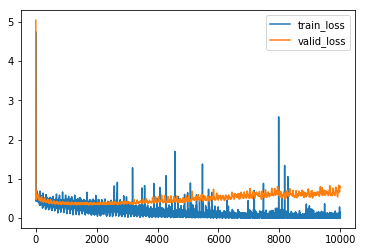

In [5]:
import matplotlib.pyplot as mplot

mplot.plot(train_loss, label='train_loss')
mplot.plot(valid_loss, label='valid_loss')
mplot.legend()
mplot.show()

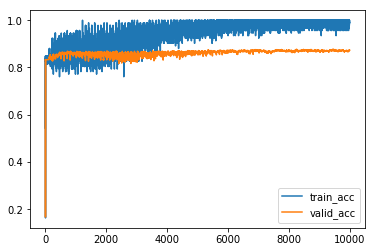

In [6]:
# import matplotlib.pyplot as mplot

mplot.plot(train_acc, label='train_acc')
mplot.plot(valid_acc, label='valid_acc')
mplot.legend()
mplot.show()